<!-- View in Collab: [https://colab.research.google.com/dri -->

# Time Series Analysis 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
pd.set_option('plotting.backend', 'plotly')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from IPython.display import display, Markdown
# import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
sns.set_theme(style="whitegrid")
import plotly.io as pio
pio.renderers.default = "notebook_connected+png"

In [2]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'notebook_connected+png'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
df = pd.read_parquet("../../data/processed/train_enhanced.parquet")
train_location_type_agg = pd.read_parquet("../../data/processed/train_location_type_agg.parquet")
train_region_code_agg = pd.read_parquet("../../data/processed/train_region_code_agg.parquet")
train_store_type_agg = pd.read_parquet("../../data/processed/train_store_type_agg.parquet")
holiday_df= pd.read_csv("../../data/processed/holidays.csv")

In [4]:
# for store_type in train_store_type_agg["Store_Type"].unique():
#     fig.add_trace(go.Scatter(x=train_store_type_agg[train_store_type_agg["Store_Type"] == store_type]["Date"],
#                              y=train_store_type_agg[train_store_type_agg["Store_Type"] == store_type]["Total_Sales"],
#                              mode='lines',
#                              name=store_type))


In [5]:
holidays=holiday_df[holiday_df["Holiday"]==1]["Date"].to_list()

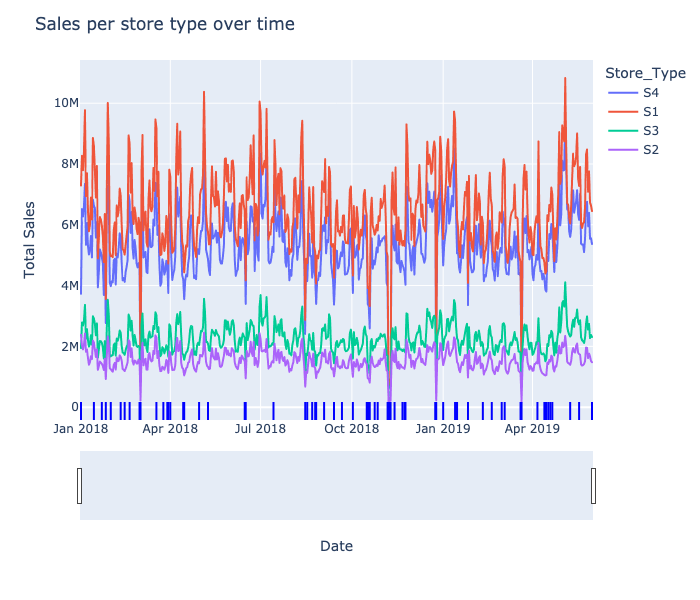

<Figure size 2000x1000 with 0 Axes>

In [7]:
plt.figure(figsize=(20, 10))
def plot_grouped_time_series(df, x, y, group, title, xaxis_title, yaxis_title):
    fig = px.line(df, x=x, y=y, color=group)
    for date in holidays:
        fig.add_shape(
            type="line",
            x0=date,
            x1=date,
            y0=0.05,  
            y1=0,   
            xref="x",
            yref="paper",
            line=dict(color="blue", width=2)
        )
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        xaxis_rangeslider_visible=True,
        height=600,
    )
    fig.show()


plot_grouped_time_series(train_store_type_agg, "Date", "Total_Sales", "Store_Type", "Sales per store type over time", "Date", "Total Sales")
# plot_grouped_time_series(train_location_type_agg, "Date", "Total_Sales", "Location_Type", "Sales per location type over time", "Date", "Total Sales")
# plot_grouped_time_series(train_region_code_agg, "Date", "Total_Sales", "Region_Code", "Sales per region code over time", "Date", "Total Sales")

In [ ]:
df[df["Store_id"]==3].sort_values("Date")["Sales"].plot()

In [97]:
result = adfuller(df[df["Store_id"]==3].sort_values("Date")["Sales"])
pvalue = result[1]

if pvalue < 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary")

The series is stationary


# Stationarity Check

We will use the Augmented Dickey-Fuller test to check if the time series is stationary.  
- Null Hypothesis: The time series is not stationary 
- Alternative Hypothesis: The time series is stationary

## For Each Location

In [9]:
for location_type in train_location_type_agg["Location_Type"].unique():
    result = adfuller(train_location_type_agg[train_location_type_agg["Location_Type"]==location_type]["Total_Sales"])
    pvalue = result[1]
    if pvalue < 0.05:
        print(f"The series for location type {location_type} is stationary")
    else:
        print(f"The series for location type {location_type} is not stationary")

The series for location type L5 is stationary
The series for location type L3 is stationary
The series for location type L2 is stationary
The series for location type L1 is stationary
The series for location type L4 is stationary


## For Each Region

In [11]:
for Region_Code in train_region_code_agg["Region_Code"].unique():
    result = adfuller(train_region_code_agg[train_region_code_agg["Region_Code"]==Region_Code]["Total_Sales"])
    pvalue = result[1]
    if pvalue < 0.05:
        print(f"The series for location type {Region_Code} is stationary")
    else:
        print(f"The series for location type {Region_Code} is not stationary")

The series for location type R4 is stationary
The series for location type R2 is stationary
The series for location type R1 is stationary
The series for location type R3 is stationary


## For Each Store Type

In [13]:
for Store_Type in train_store_type_agg["Store_Type"].unique():
    result = adfuller(train_store_type_agg[train_store_type_agg["Store_Type"]==Store_Type]["Total_Sales"])
    pvalue = result[1]
    if pvalue < 0.05:
        print(f"The series for location type {Store_Type} is stationary")
    else:
        print(f"The series for location type {Store_Type} is not stationary")

The series for location type S4 is stationary
The series for location type S1 is stationary
The series for location type S3 is stationary
The series for location type S2 is stationary


# Seasonal Decomposition

### Seasonal decomposition for location type: L5

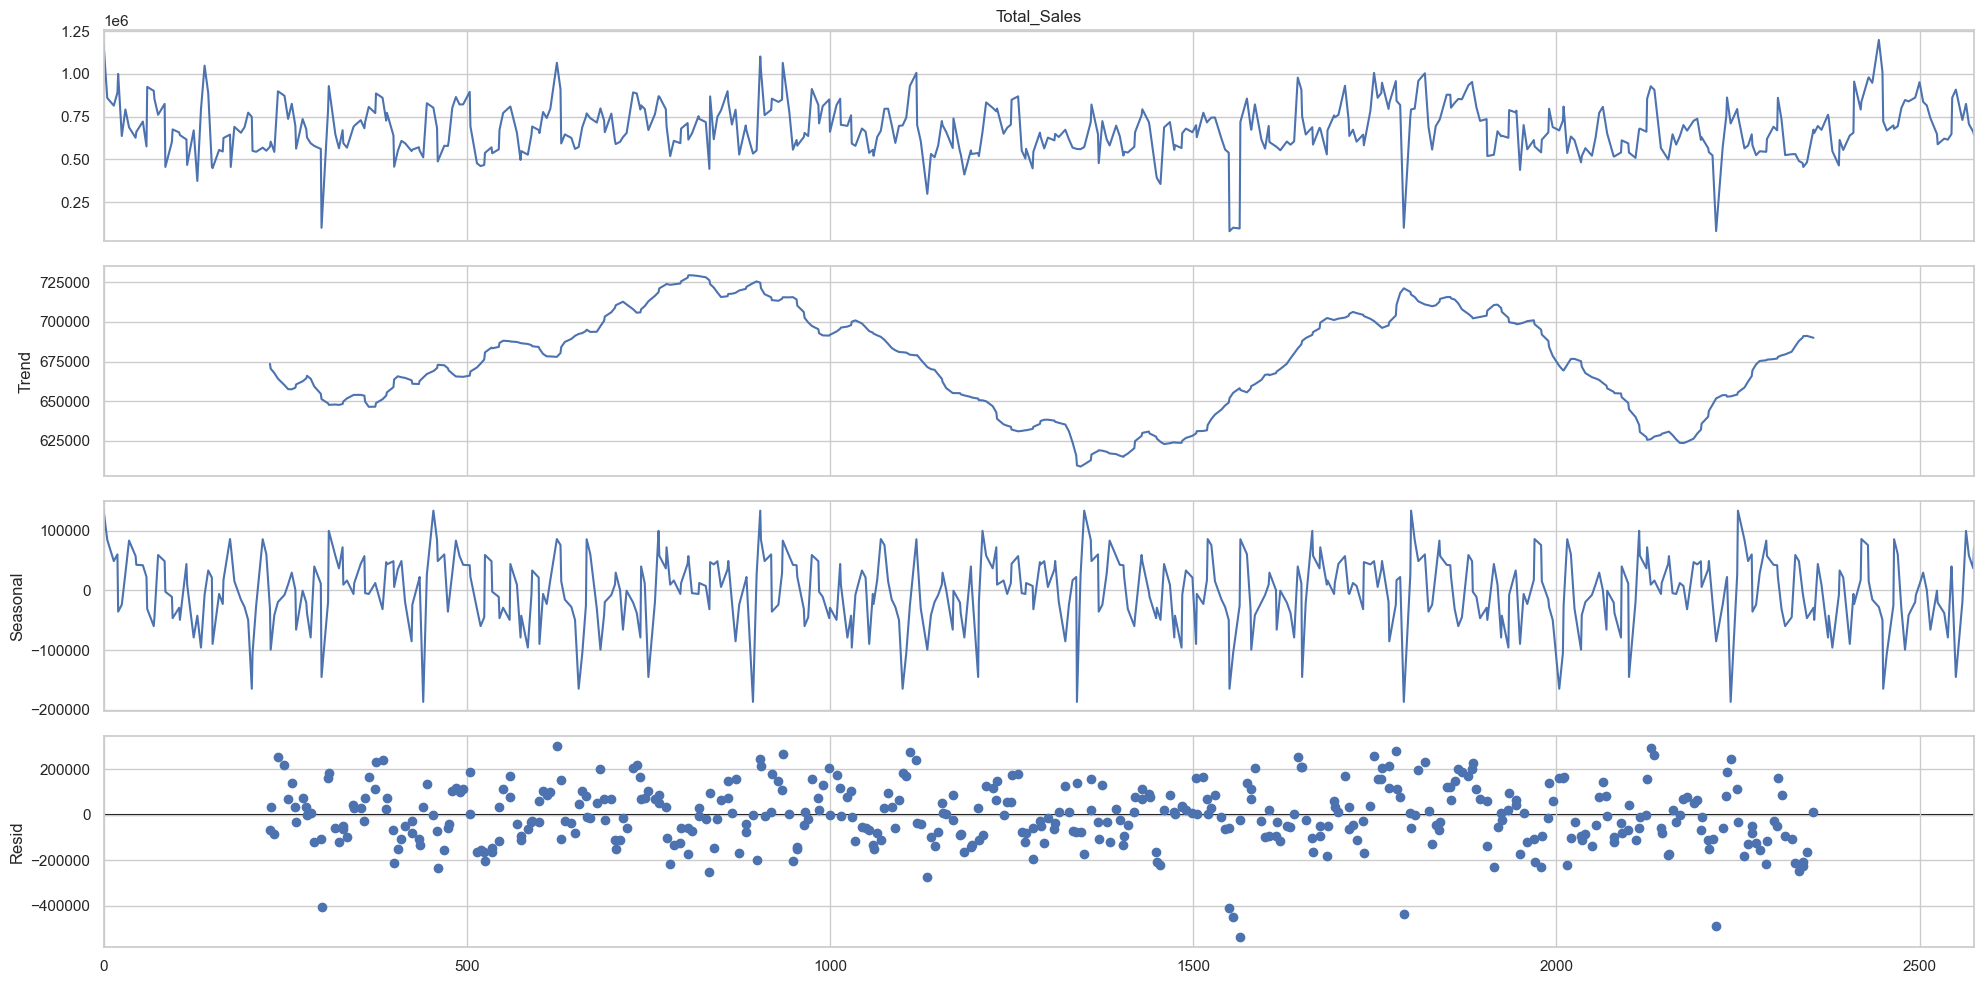

### Seasonal decomposition for location type: L3

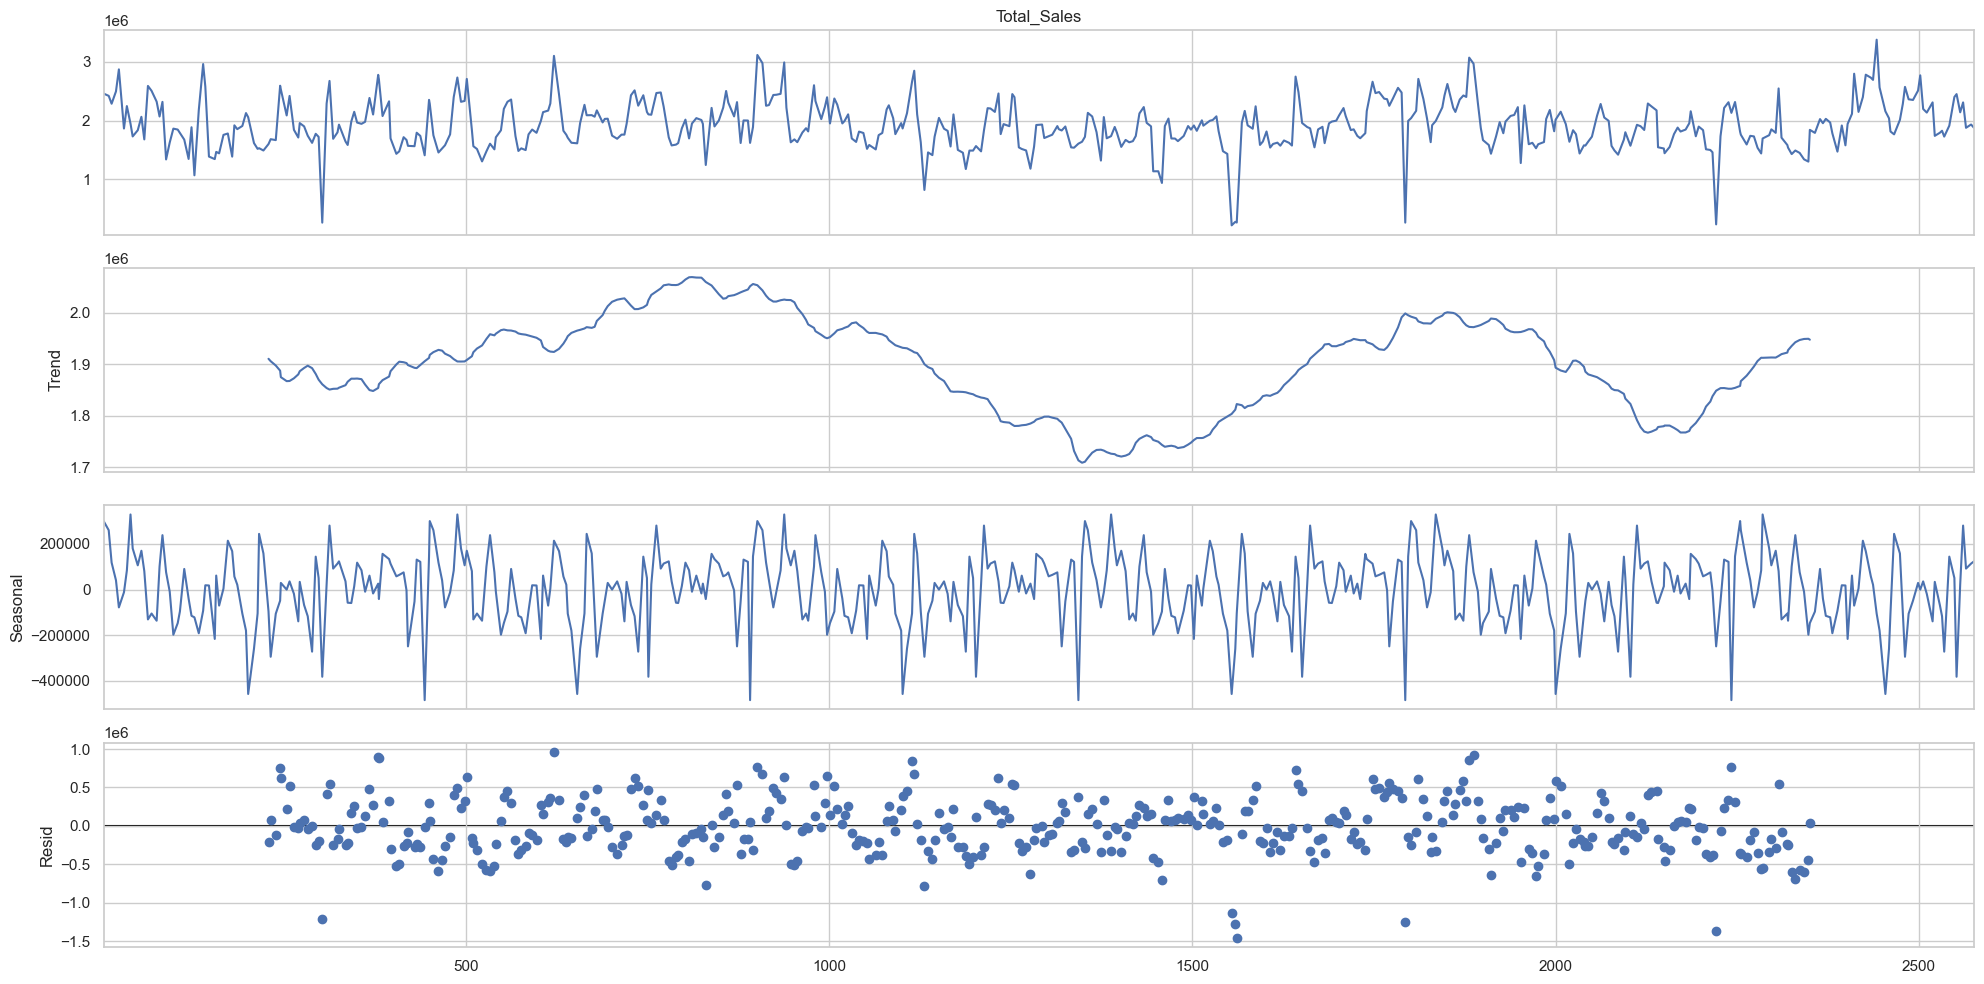

### Seasonal decomposition for location type: L2

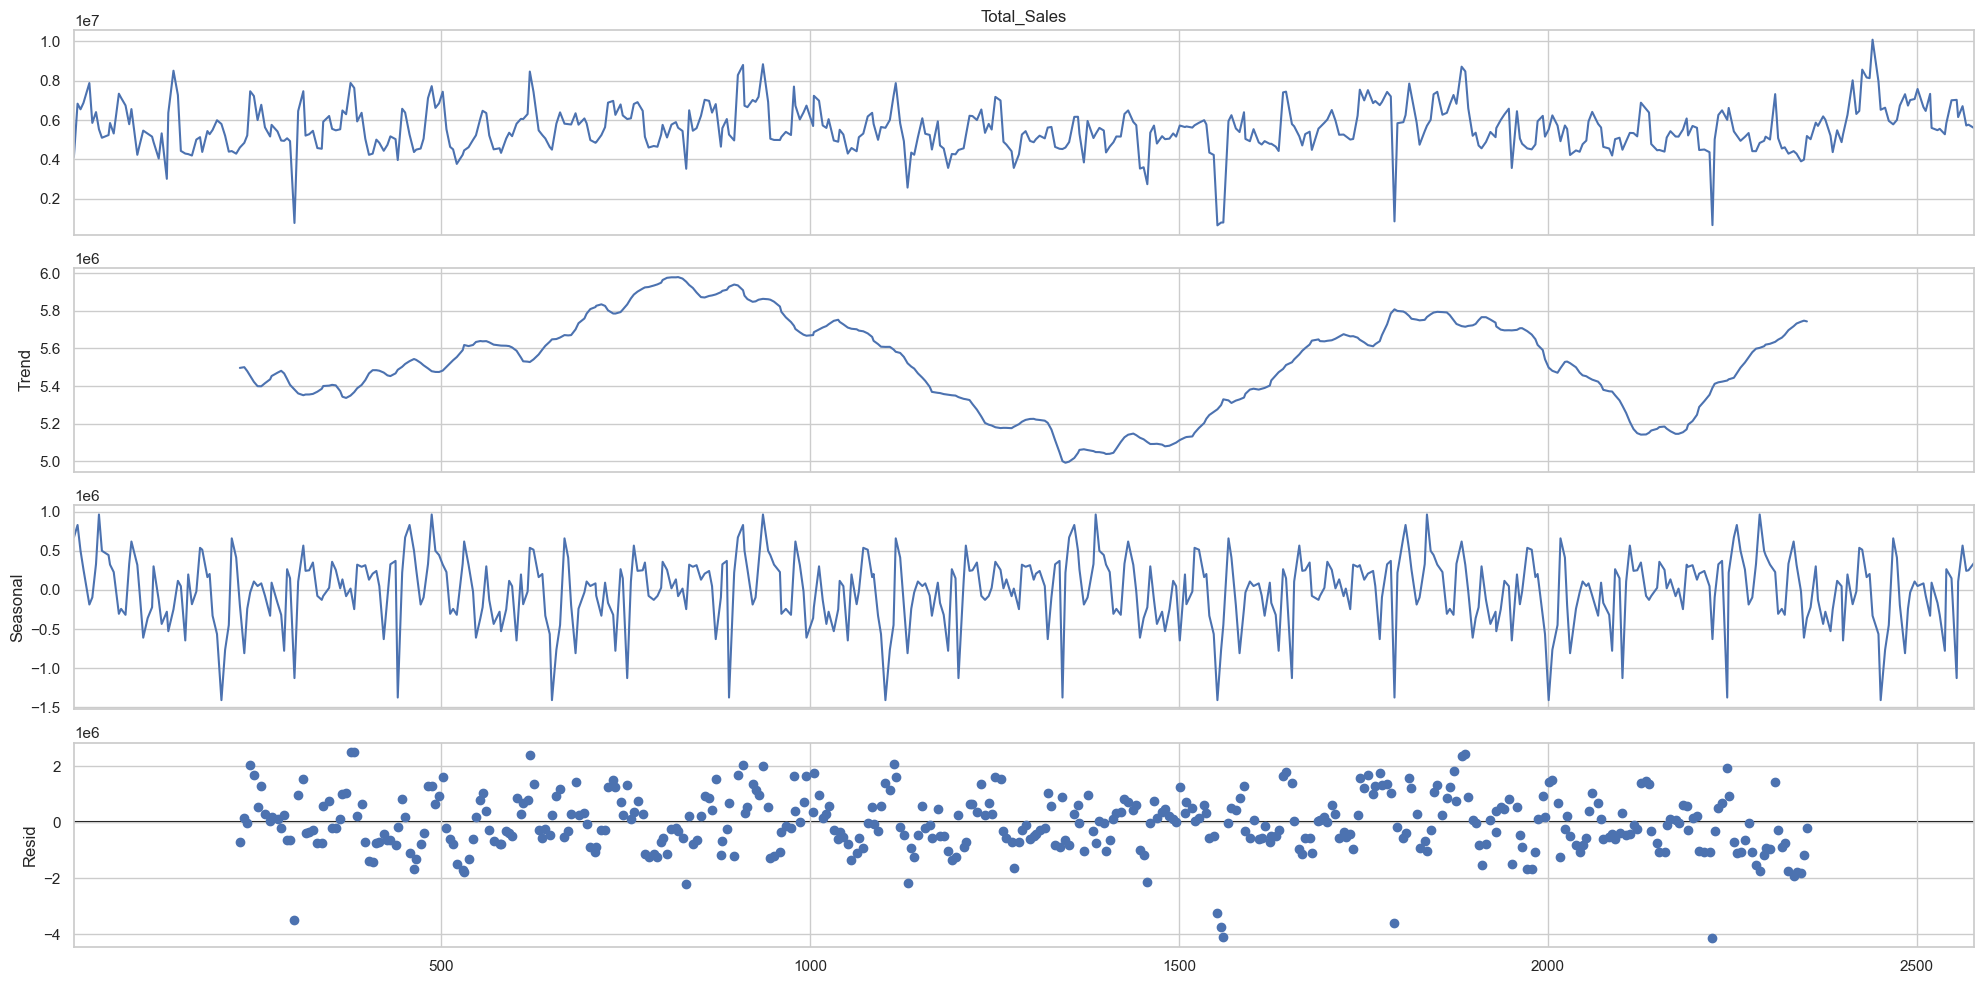

### Seasonal decomposition for location type: L1

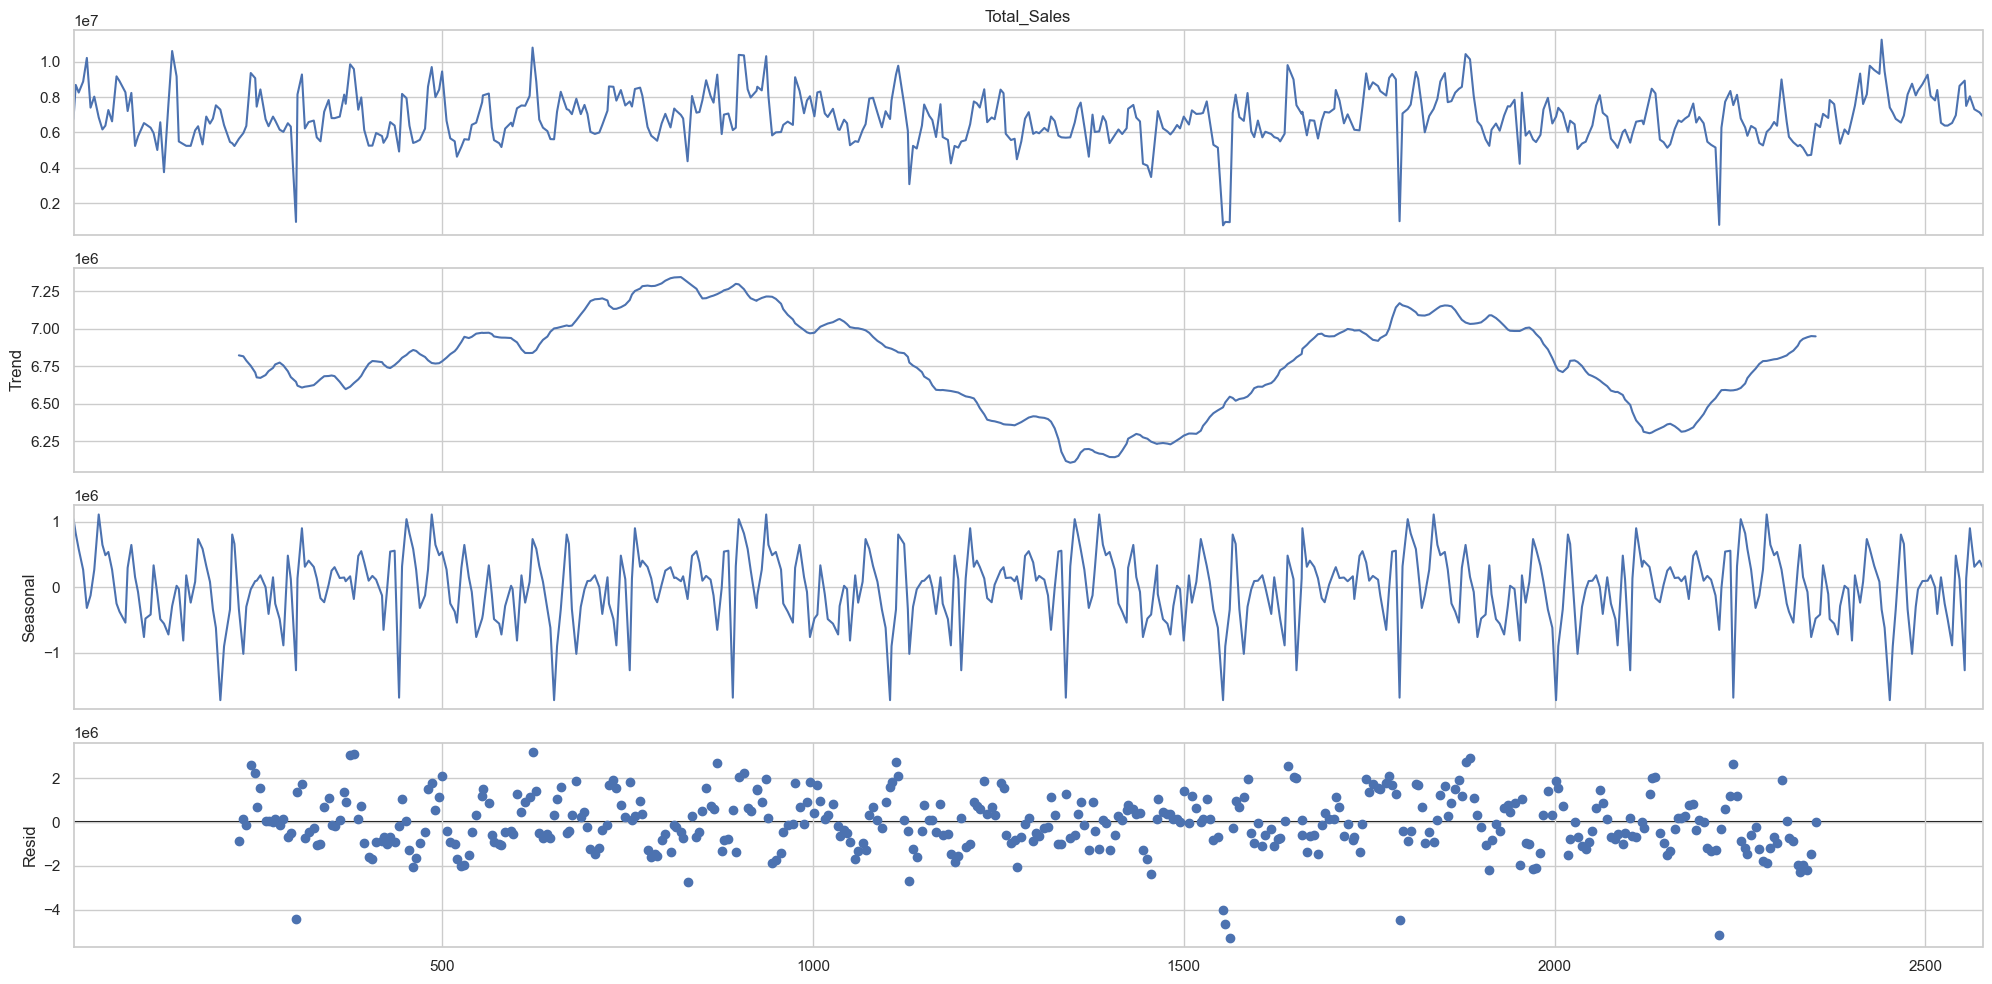

### Seasonal decomposition for location type: L4

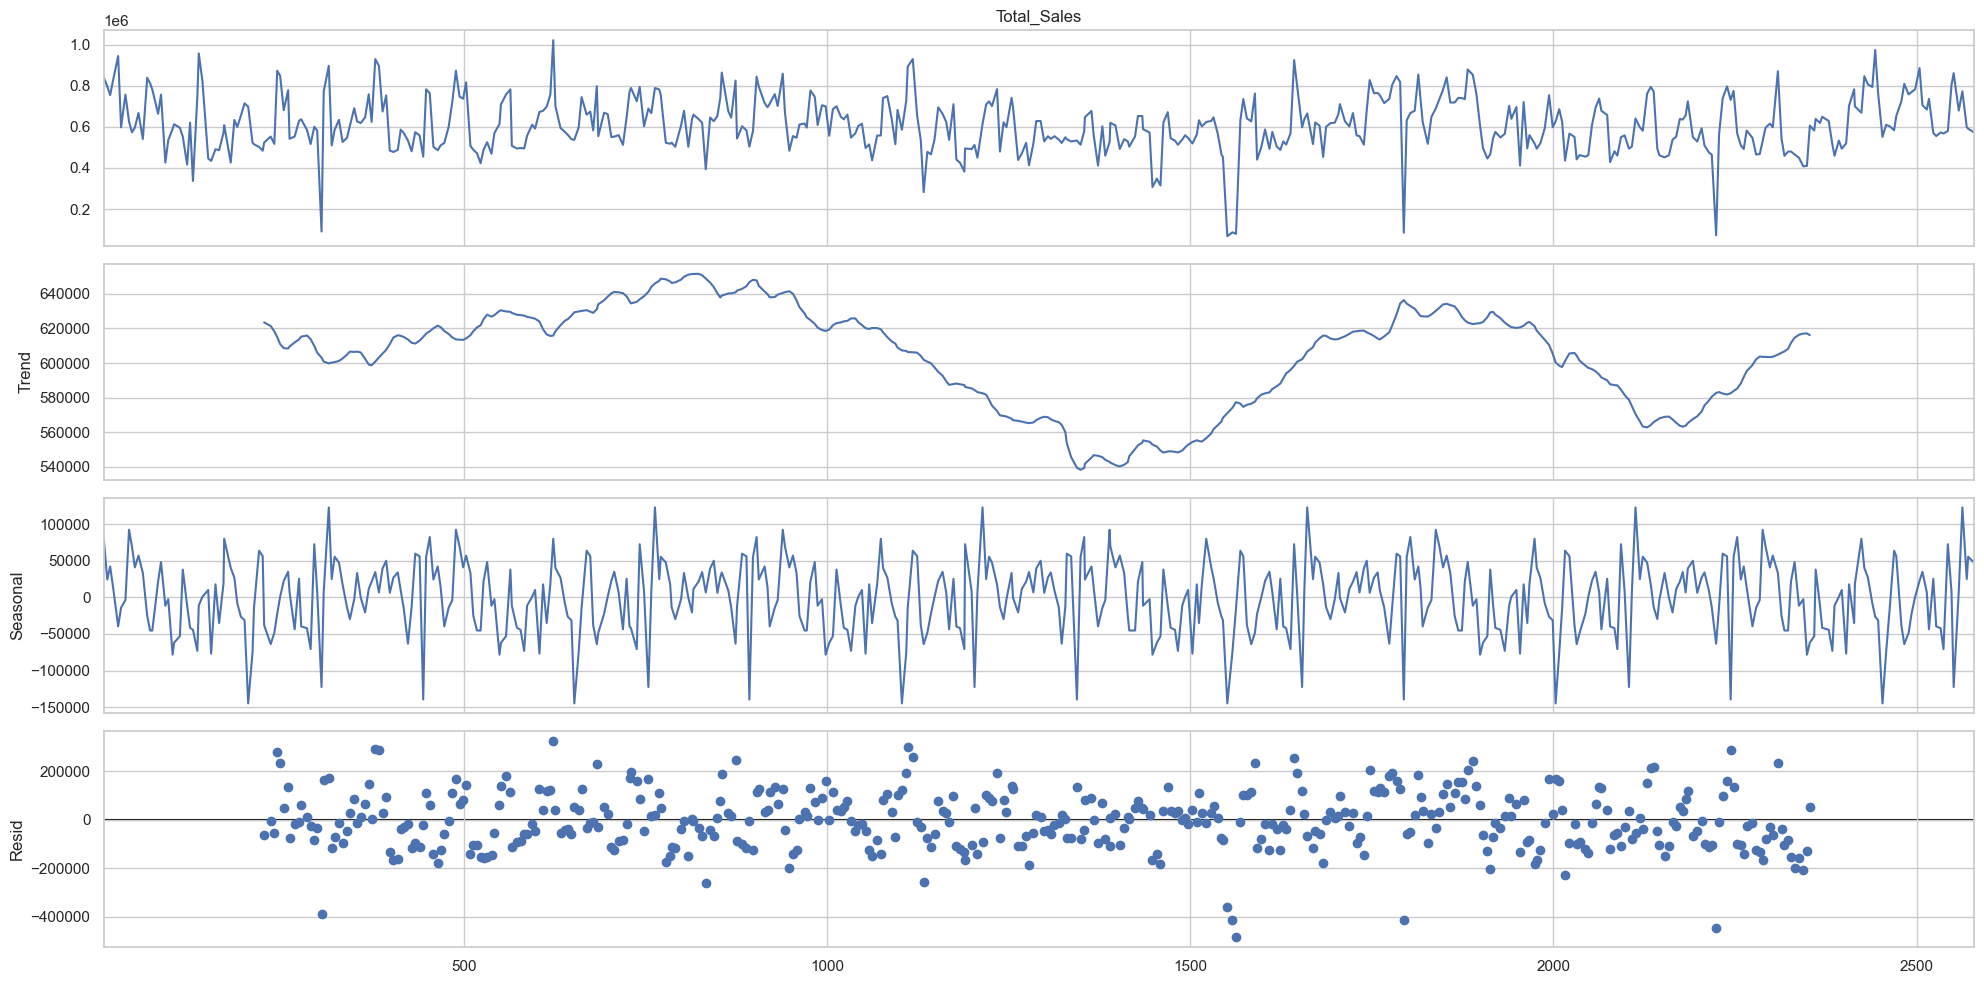

In [9]:
plt.rc("figure",figsize=(20,10))
for location_type in train_location_type_agg["Location_Type"].unique():
    display(Markdown('### Seasonal decomposition for location type: ' + location_type))
    result = seasonal_decompose(train_location_type_agg[train_location_type_agg["Location_Type"] == location_type]["Total_Sales"], model='additive', period=90)
    result.plot();
    plt.show()

### Seasonal decomposition for Region code: R4

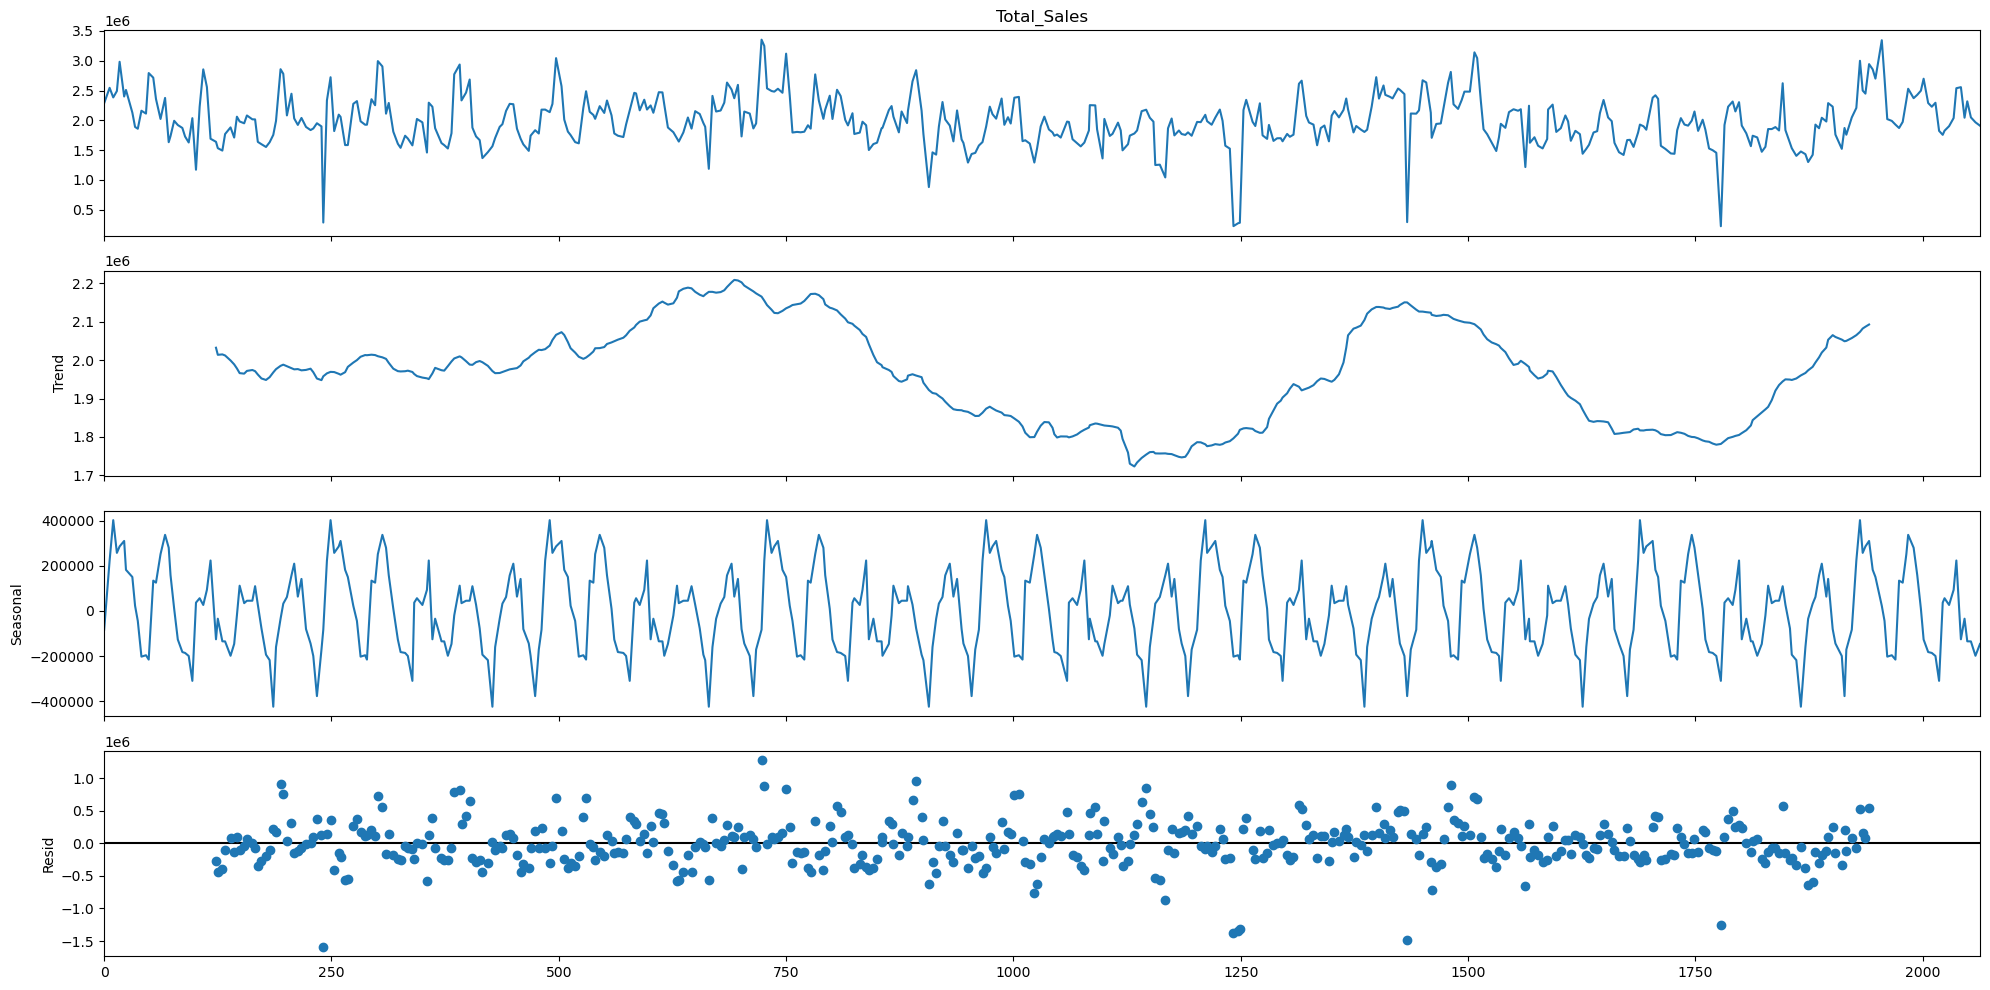

### Seasonal decomposition for Region code: R2

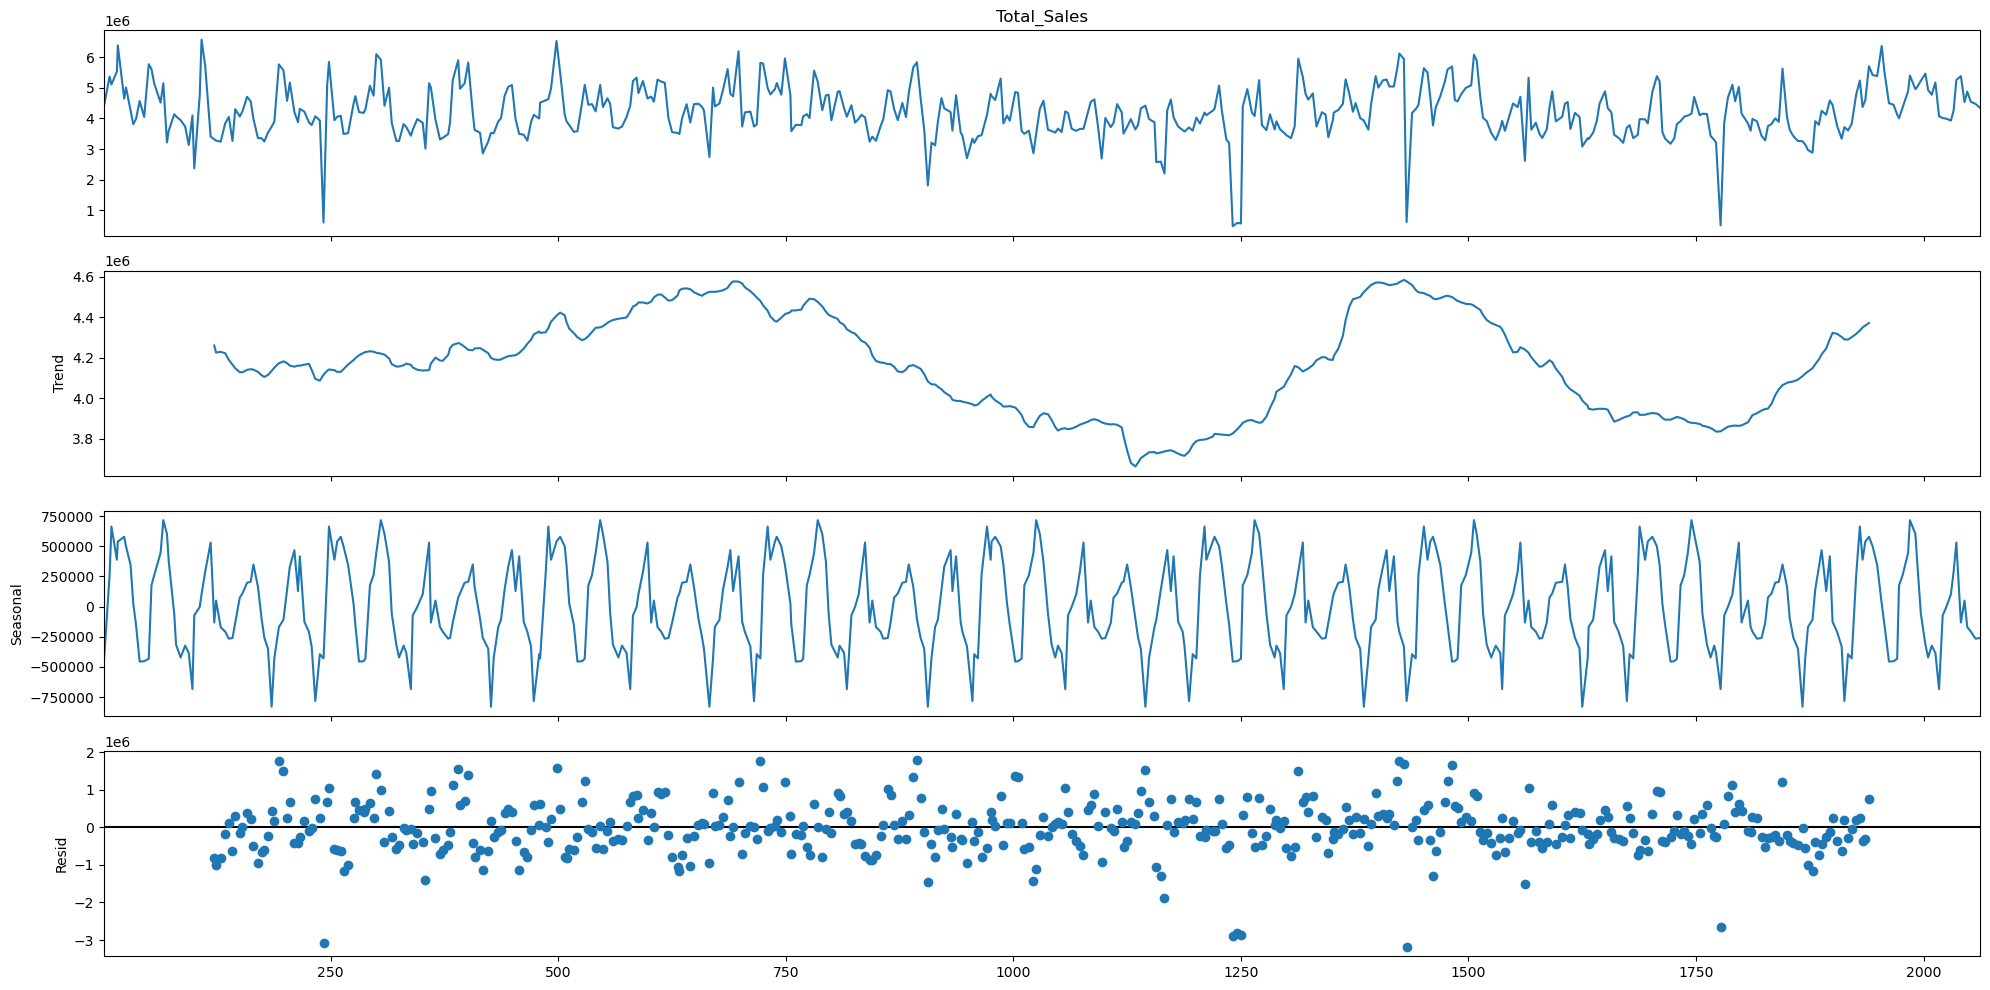

### Seasonal decomposition for Region code: R1

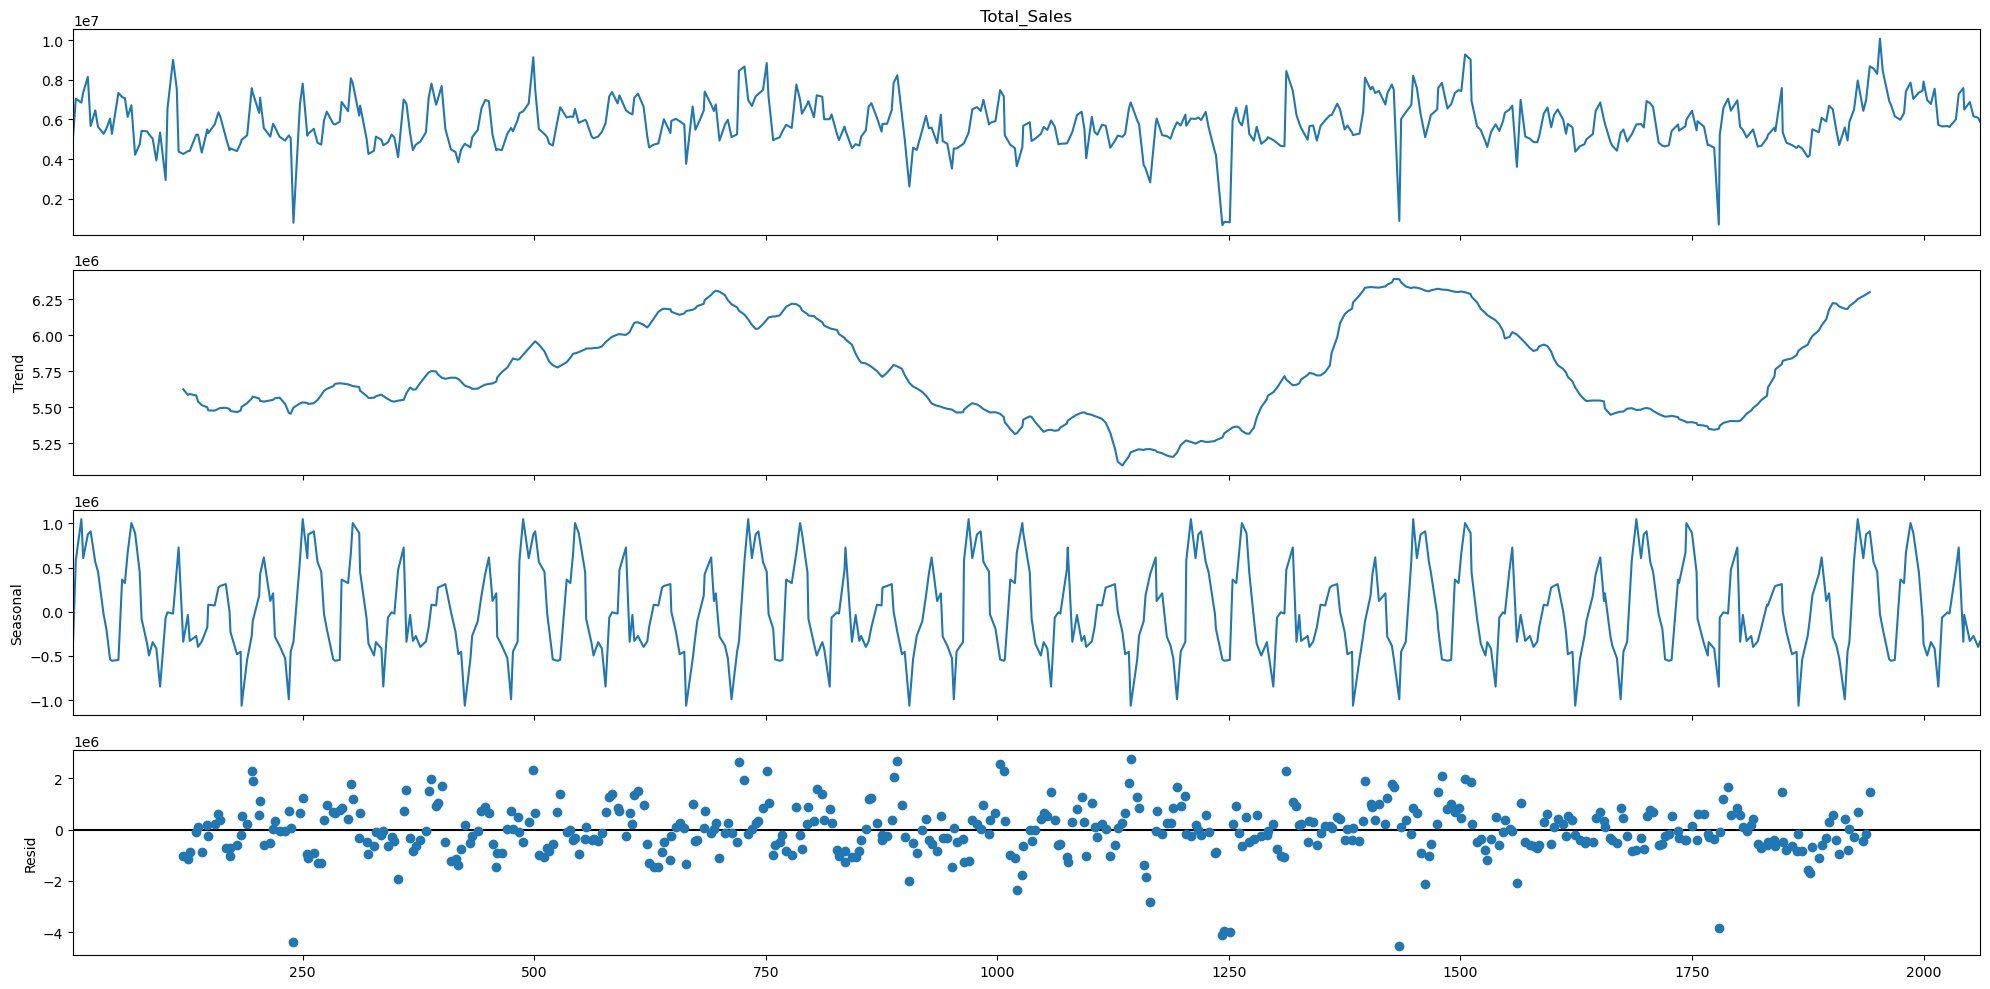

### Seasonal decomposition for Region code: R3

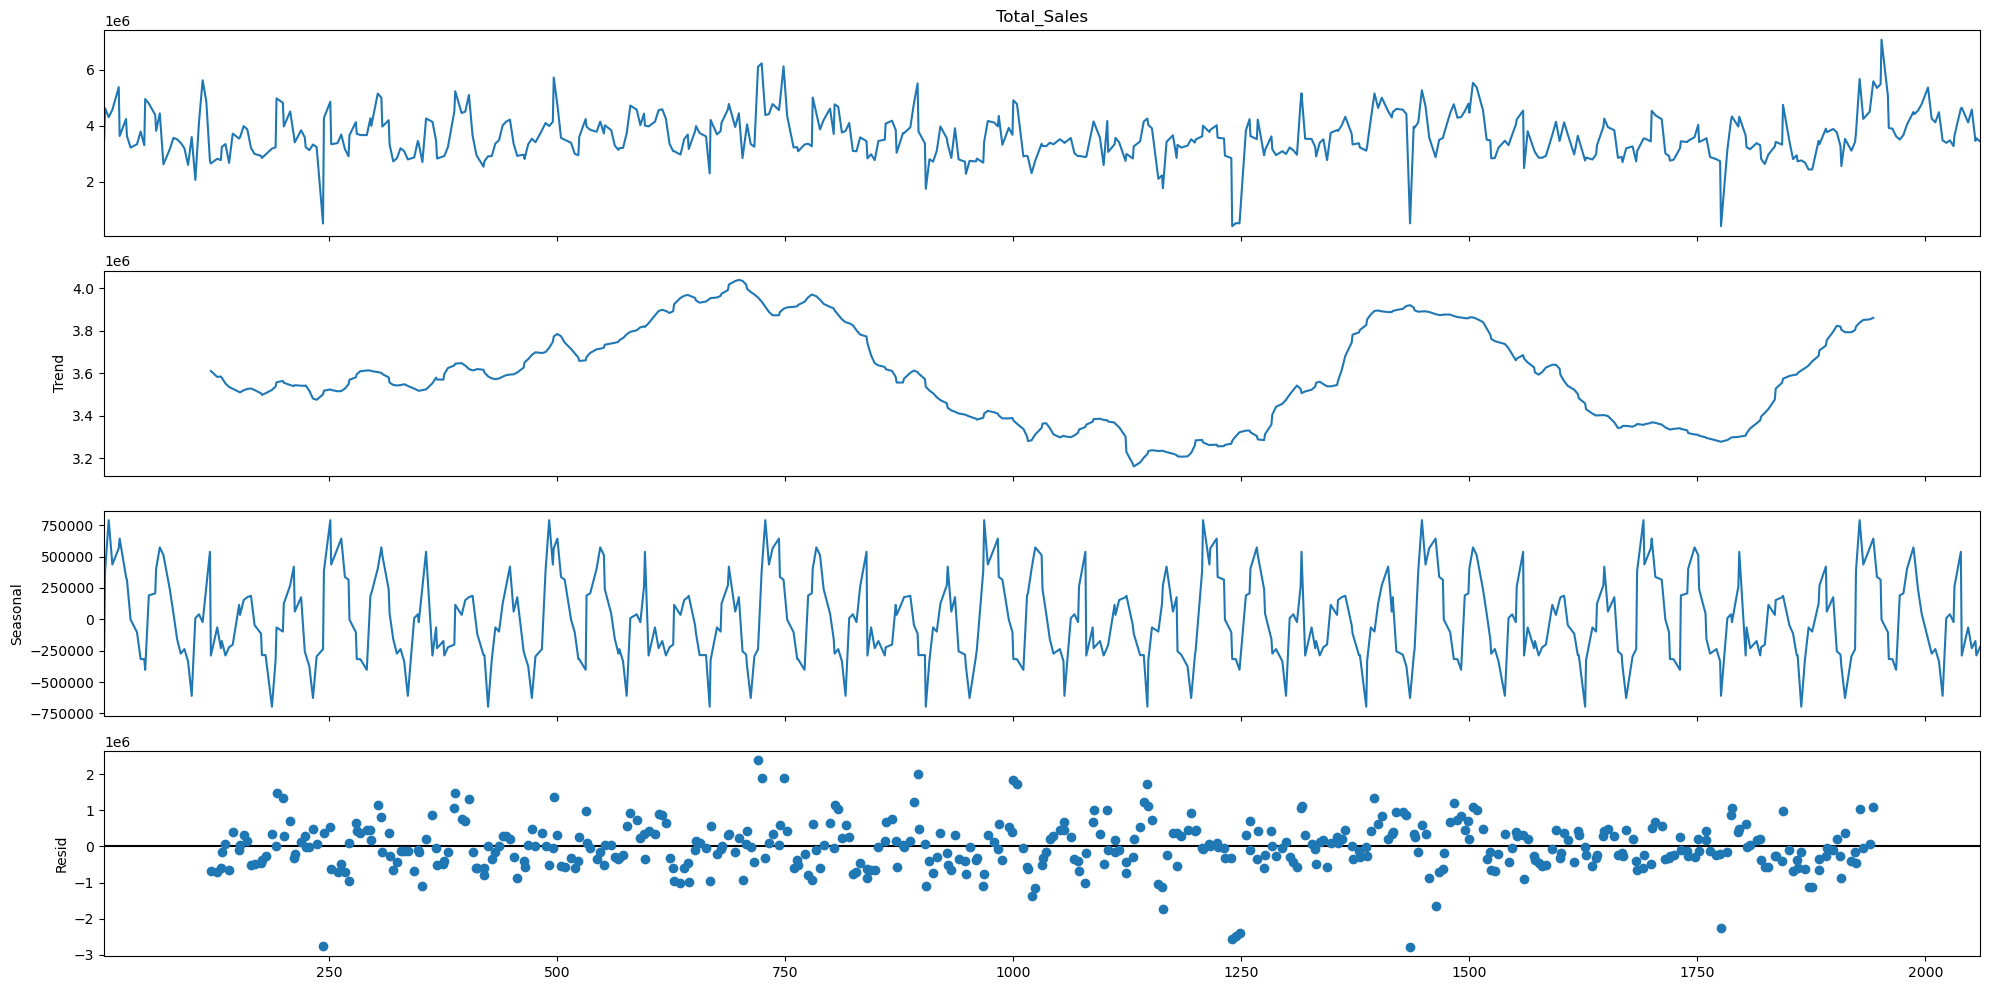

In [43]:
plt.rc("figure",figsize=(20,10))
for Region_Code in train_region_code_agg["Region_Code"].unique():
    display(Markdown('### Seasonal decomposition for Region code: ' + Region_Code))
    result = seasonal_decompose(train_region_code_agg[train_region_code_agg["Region_Code"] == Region_Code]["Total_Sales"], period=60)
    result.plot();
    plt.show()

## For Each Store Type

### Seasonal decomposition for Store type: S4

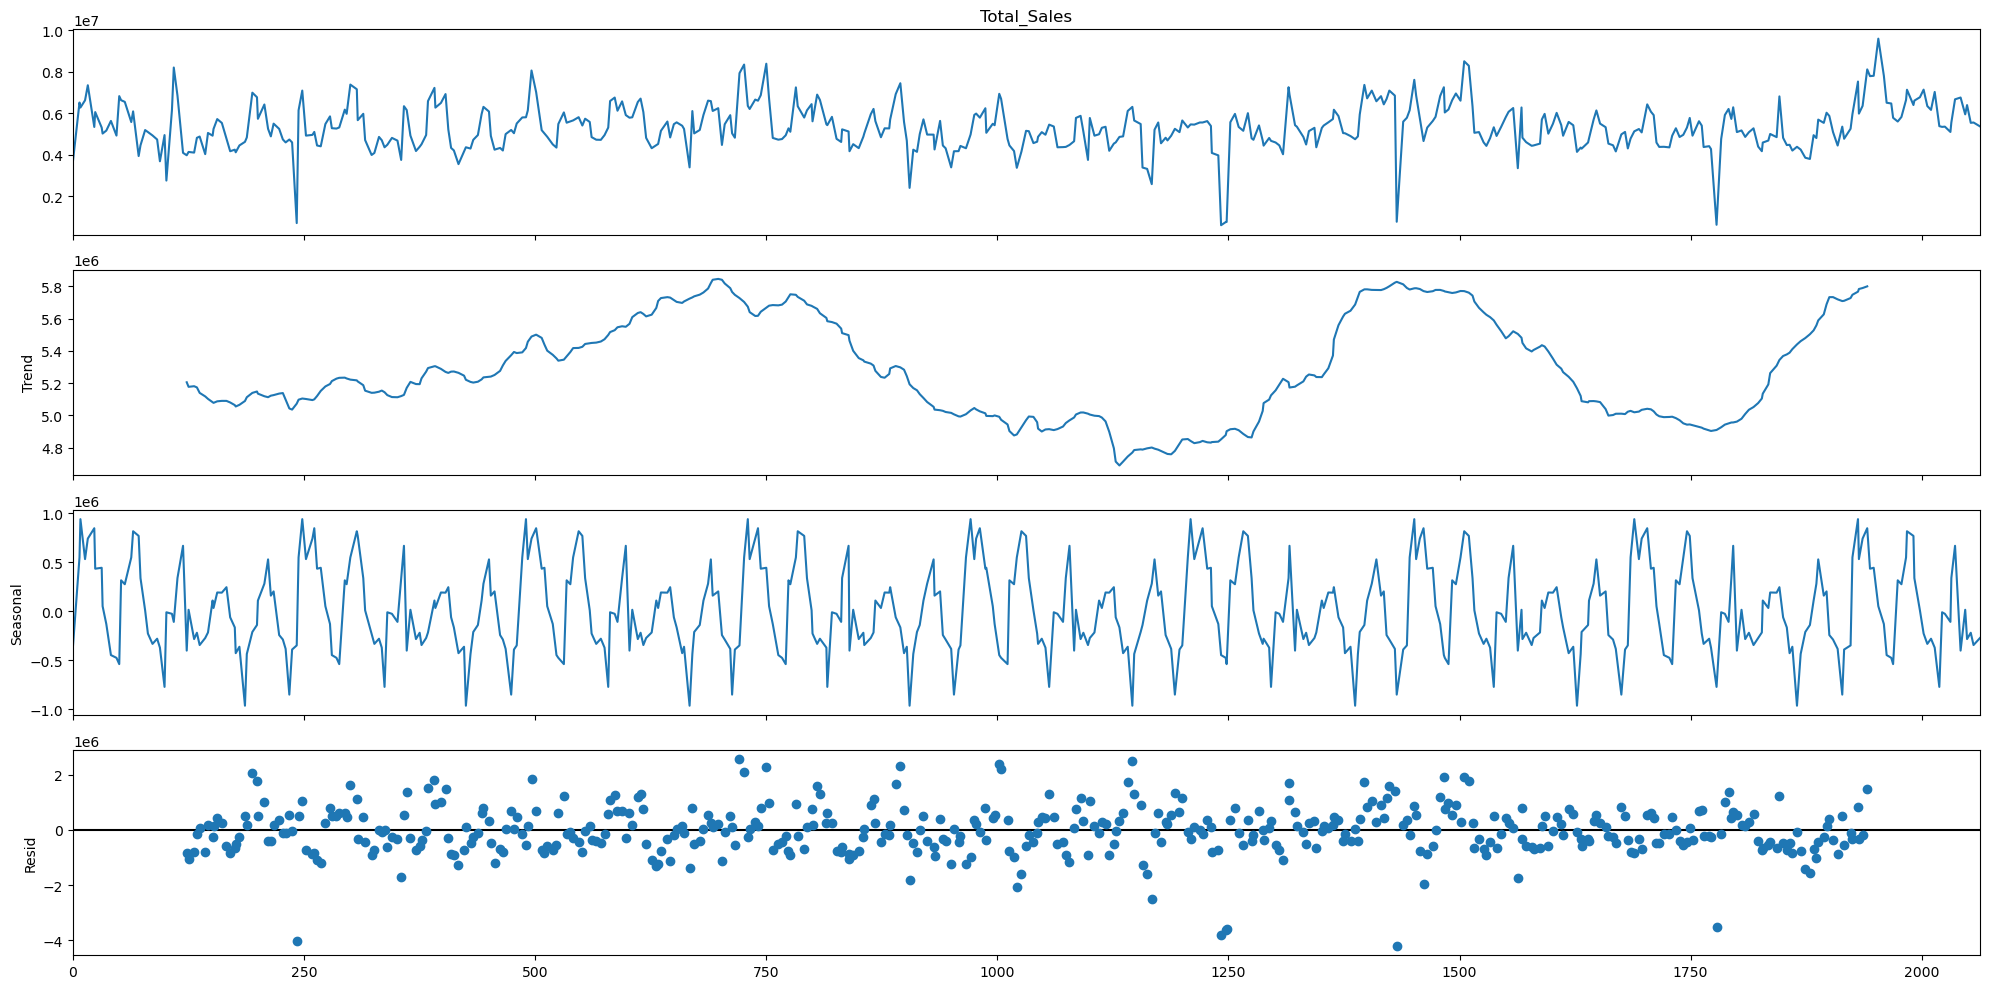

### Seasonal decomposition for Store type: S1

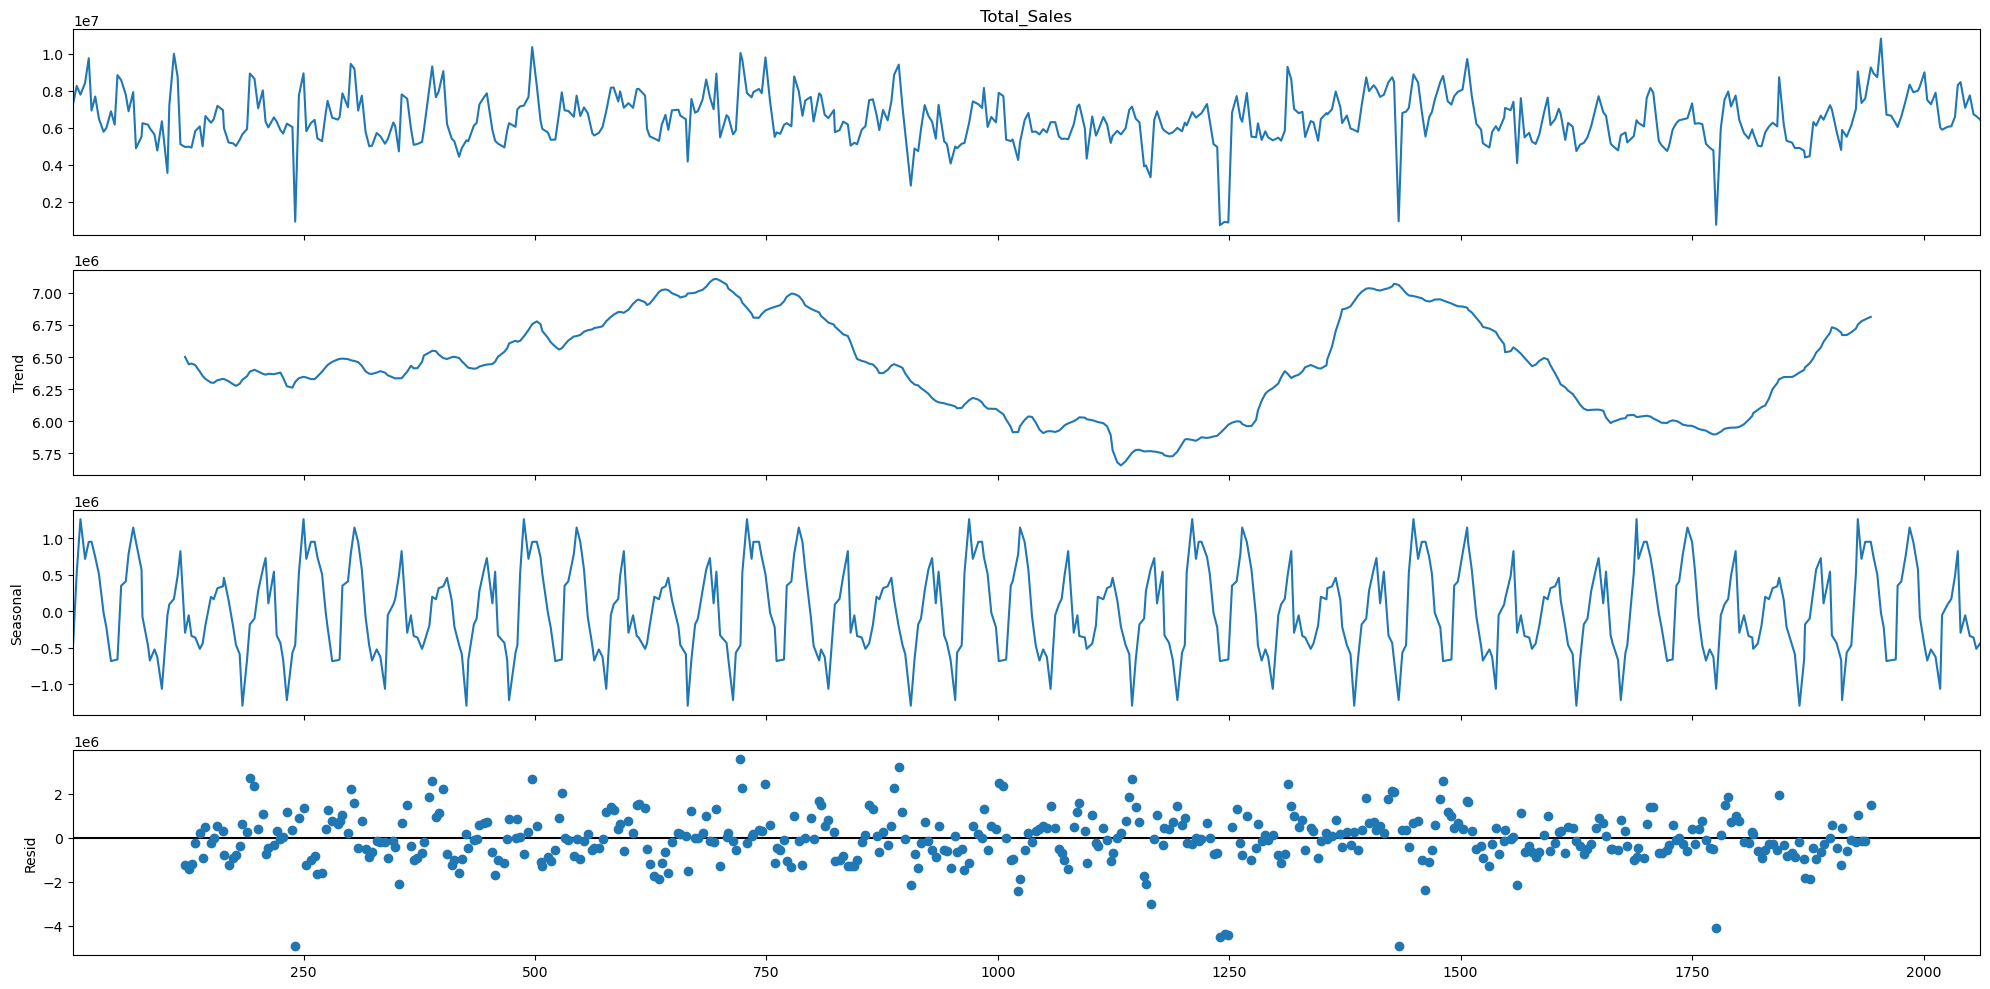

### Seasonal decomposition for Store type: S3

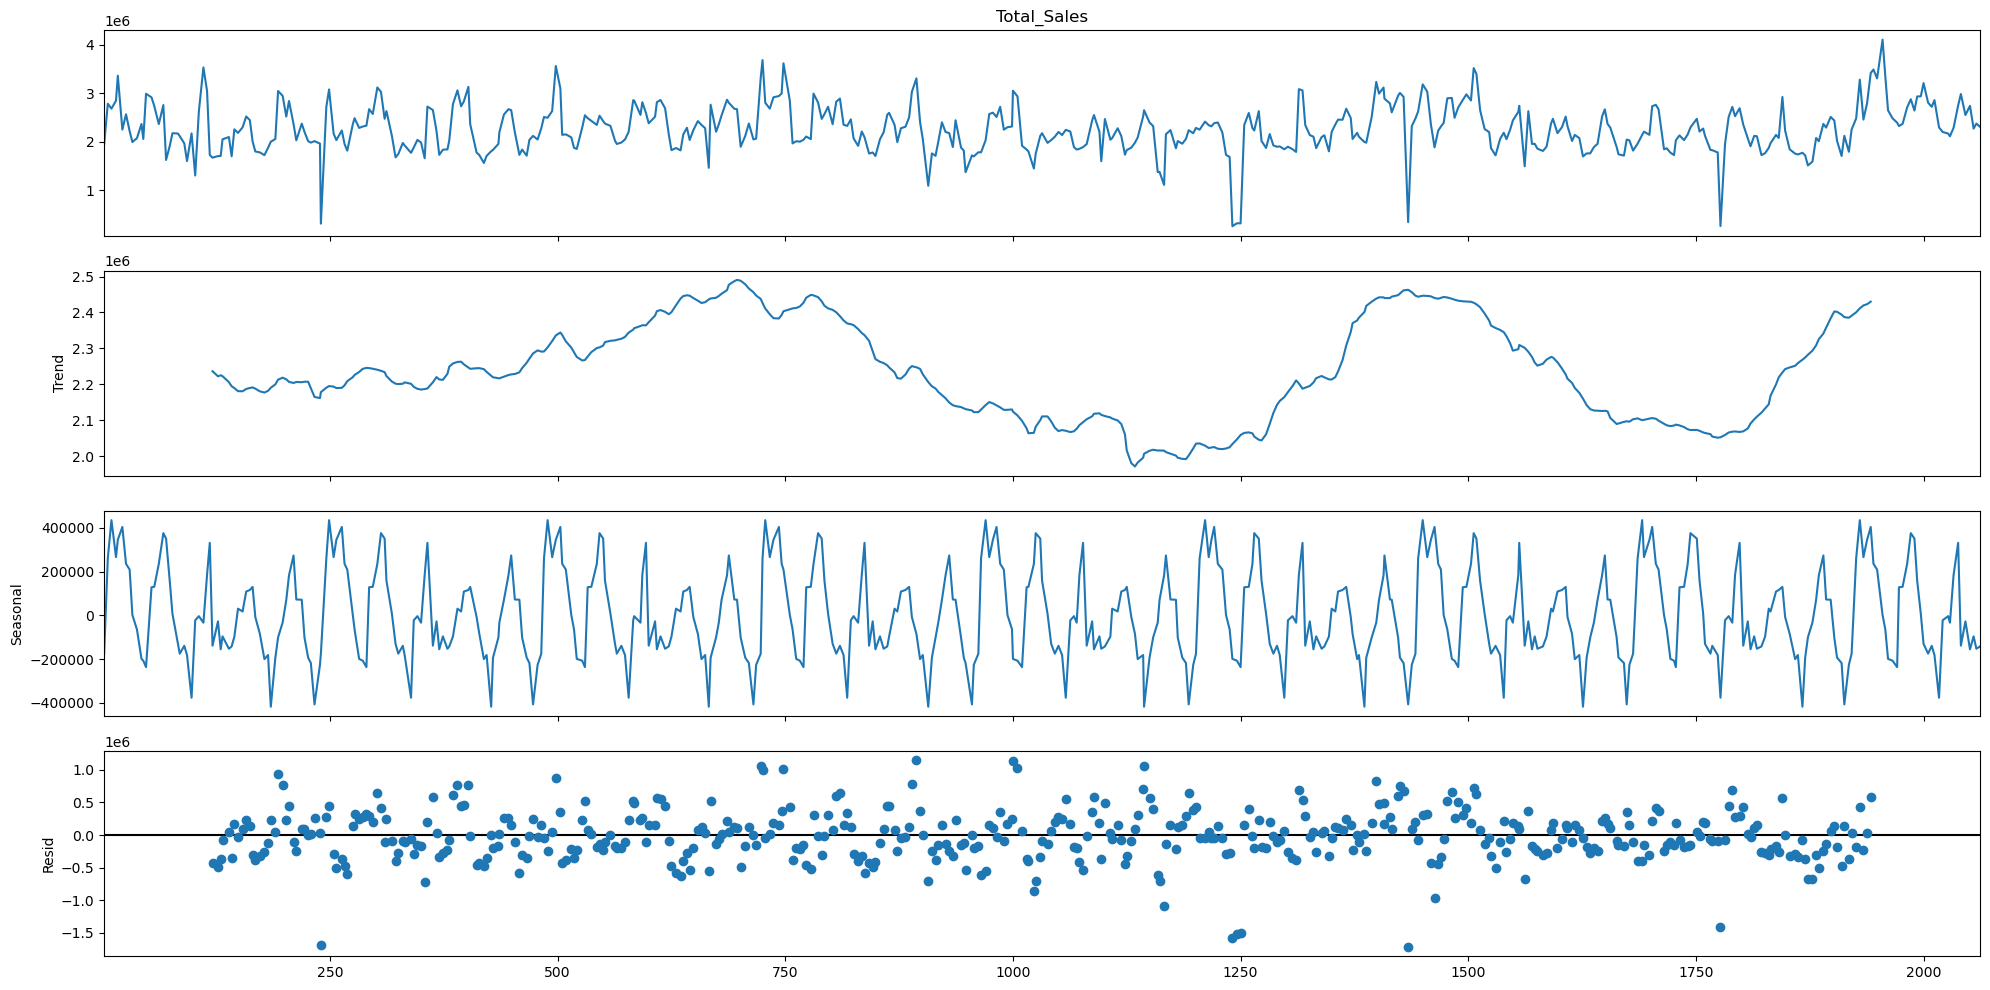

### Seasonal decomposition for Store type: S2

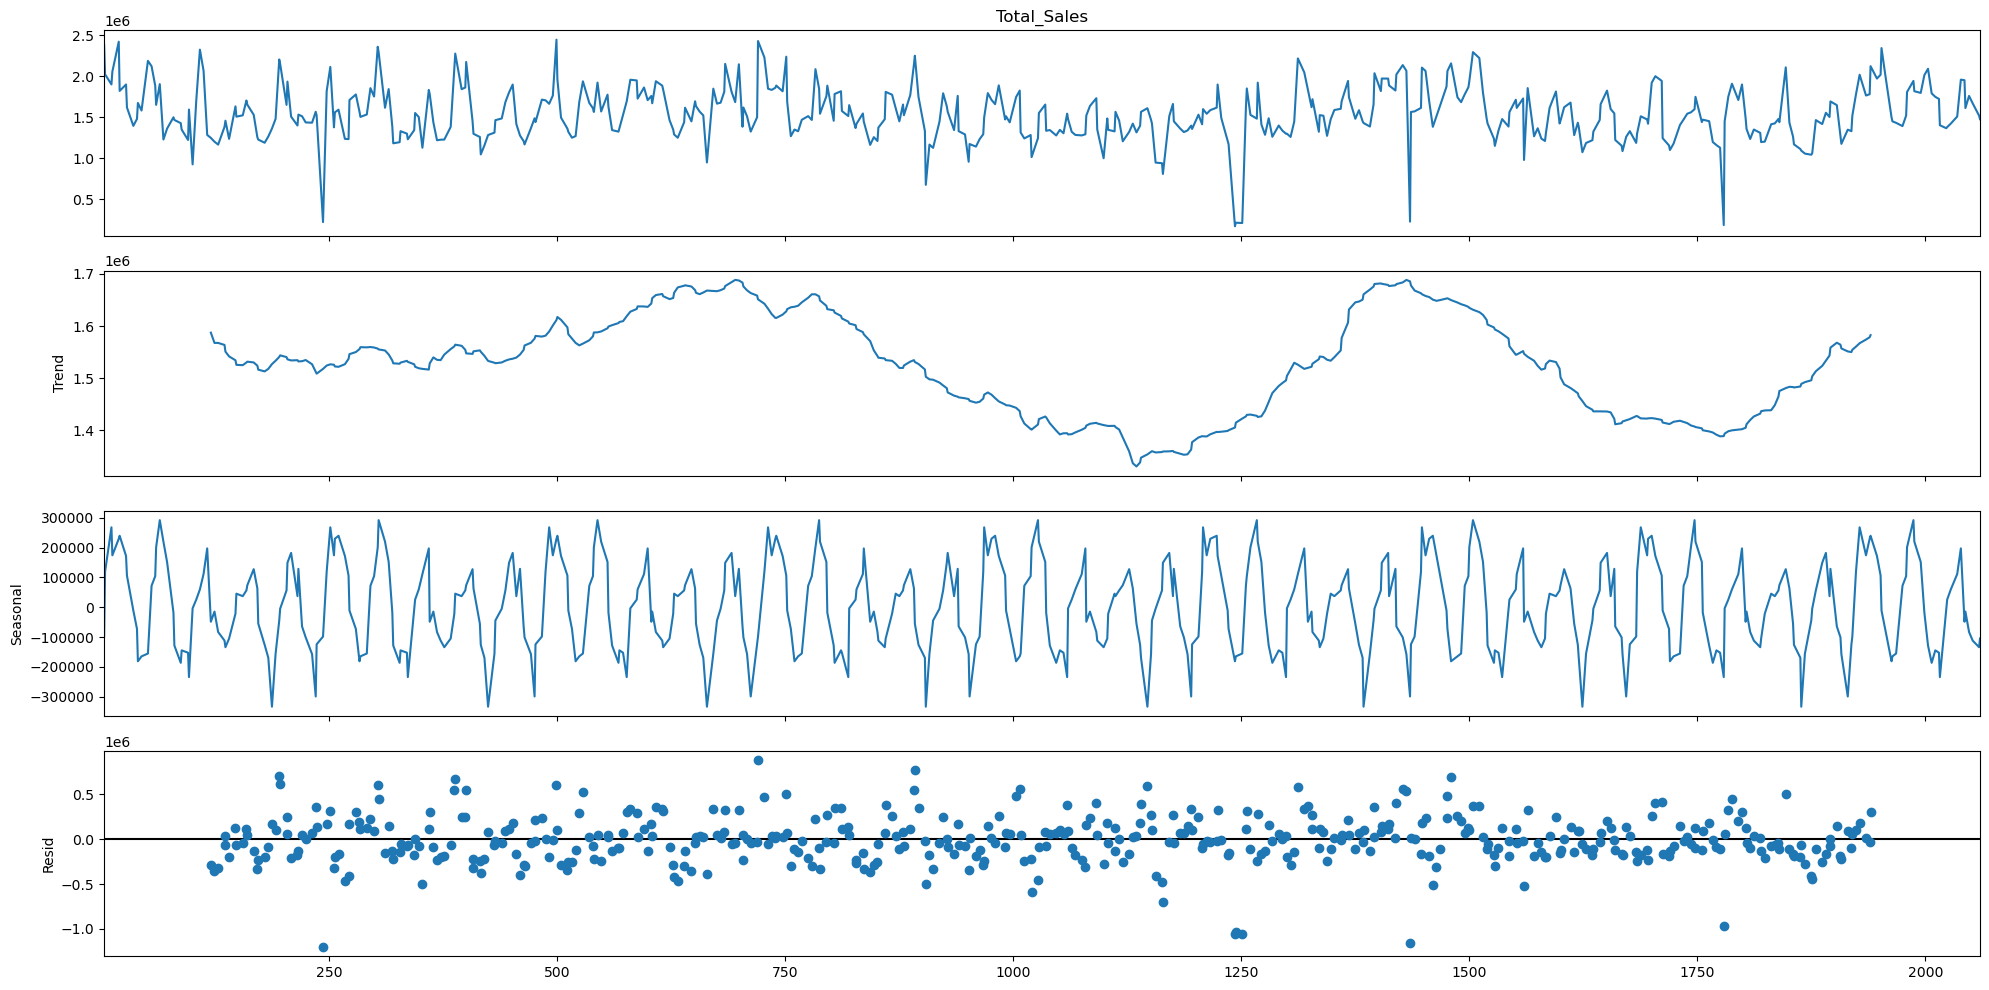

In [42]:
plt.rc("figure",figsize=(20,10))
for Store_Type in train_store_type_agg["Store_Type"].unique():
    display(Markdown('### Seasonal decomposition for Store type: ' + Store_Type))
    result = seasonal_decompose(train_store_type_agg[train_store_type_agg["Store_Type"] == Store_Type]["Total_Sales"], period=60)
    result.plot();
    plt.show()

# Checking for Autocorrelation

### ACF and PACF for location type: L5

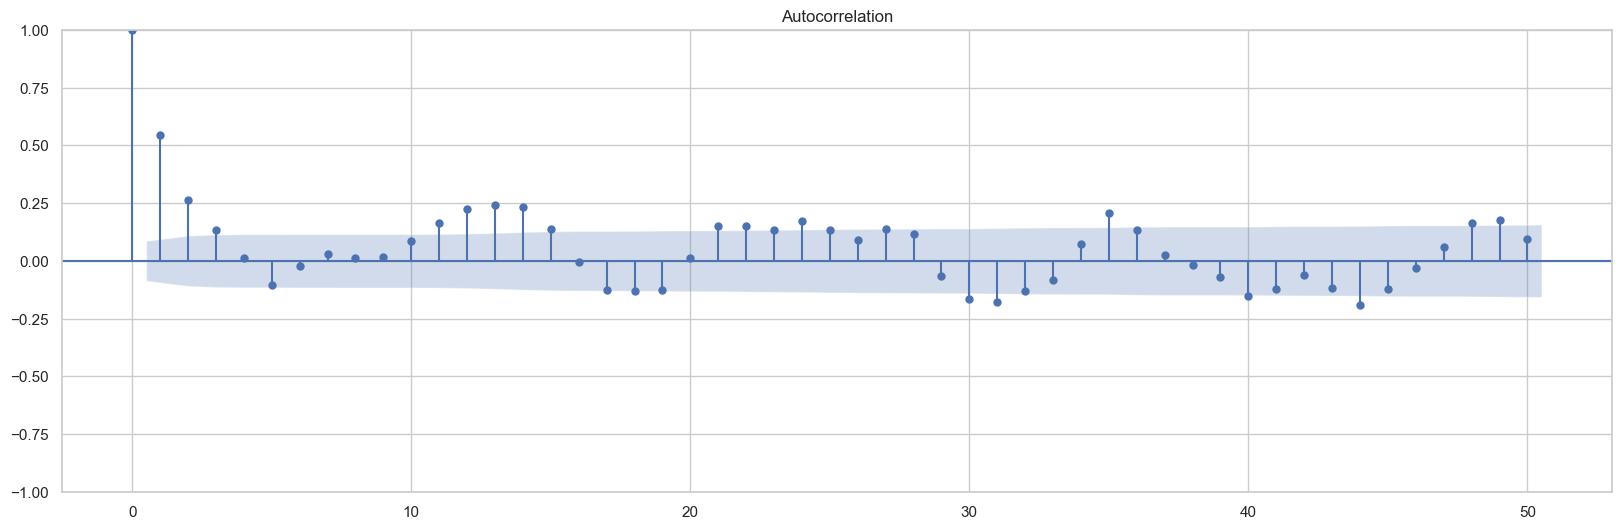

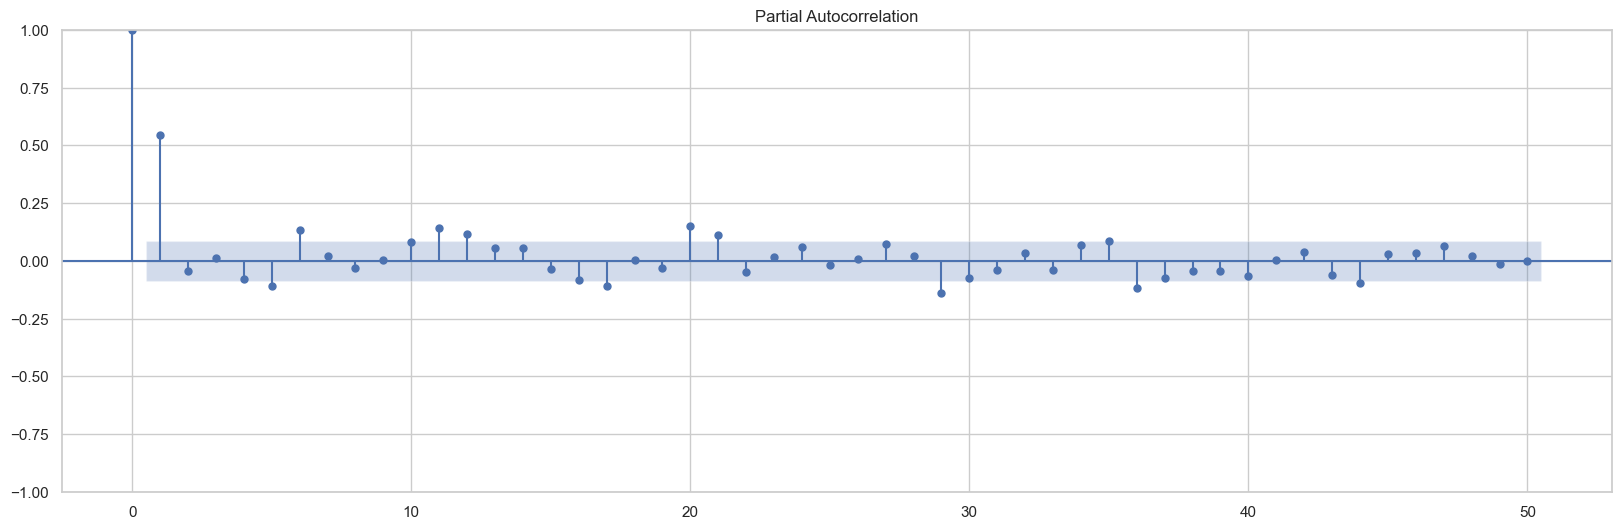

### ACF and PACF for location type: L3

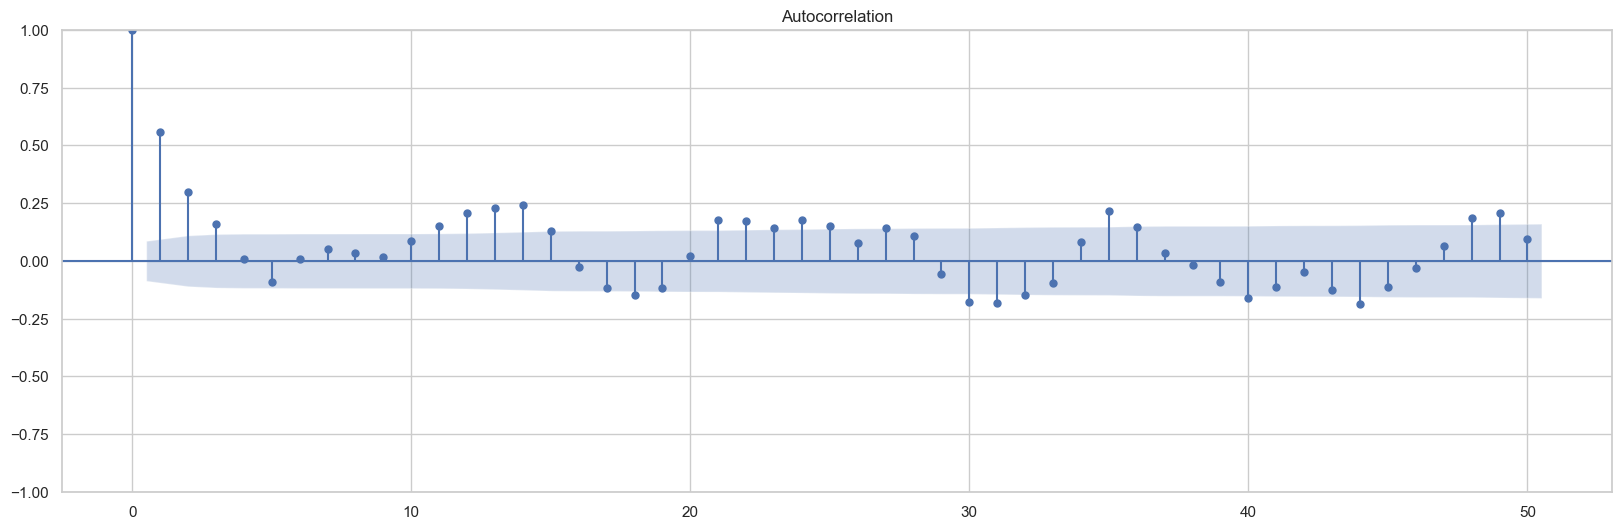

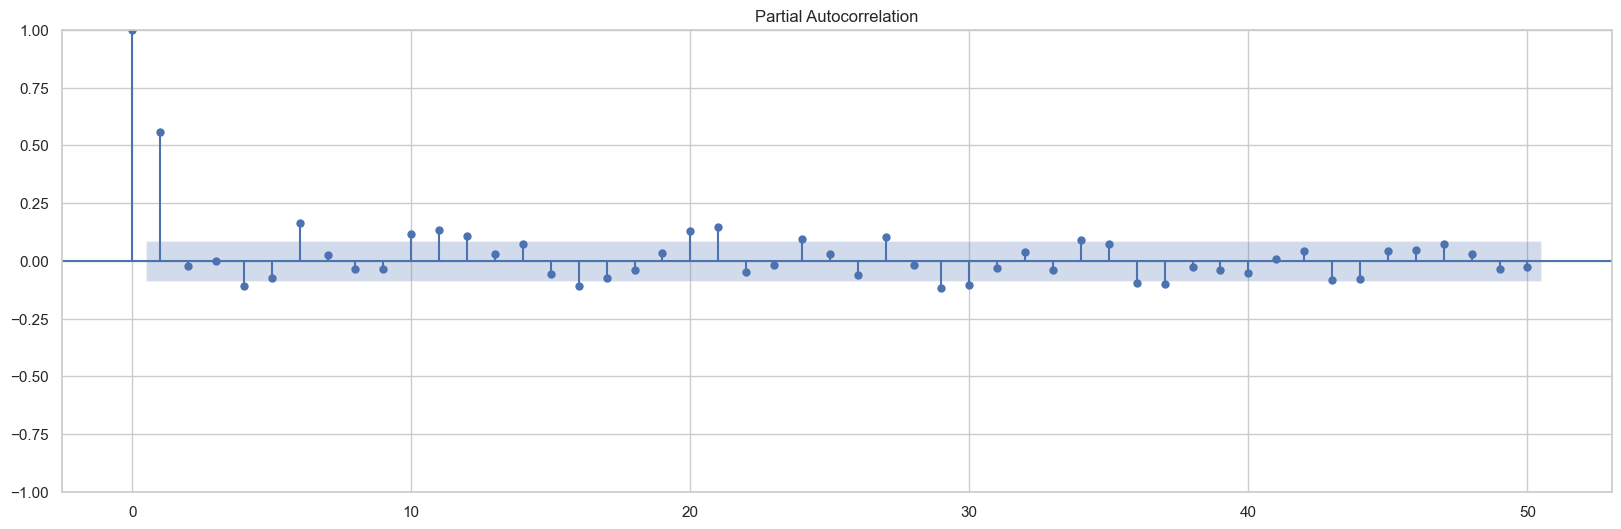

### ACF and PACF for location type: L2

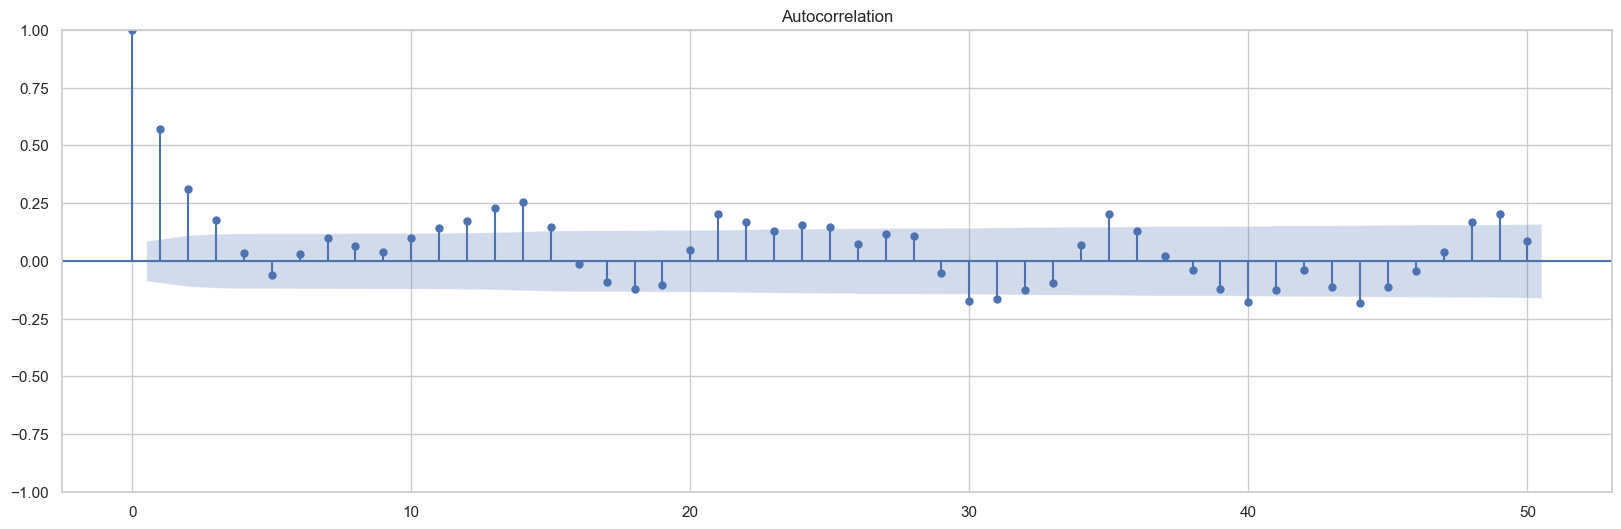

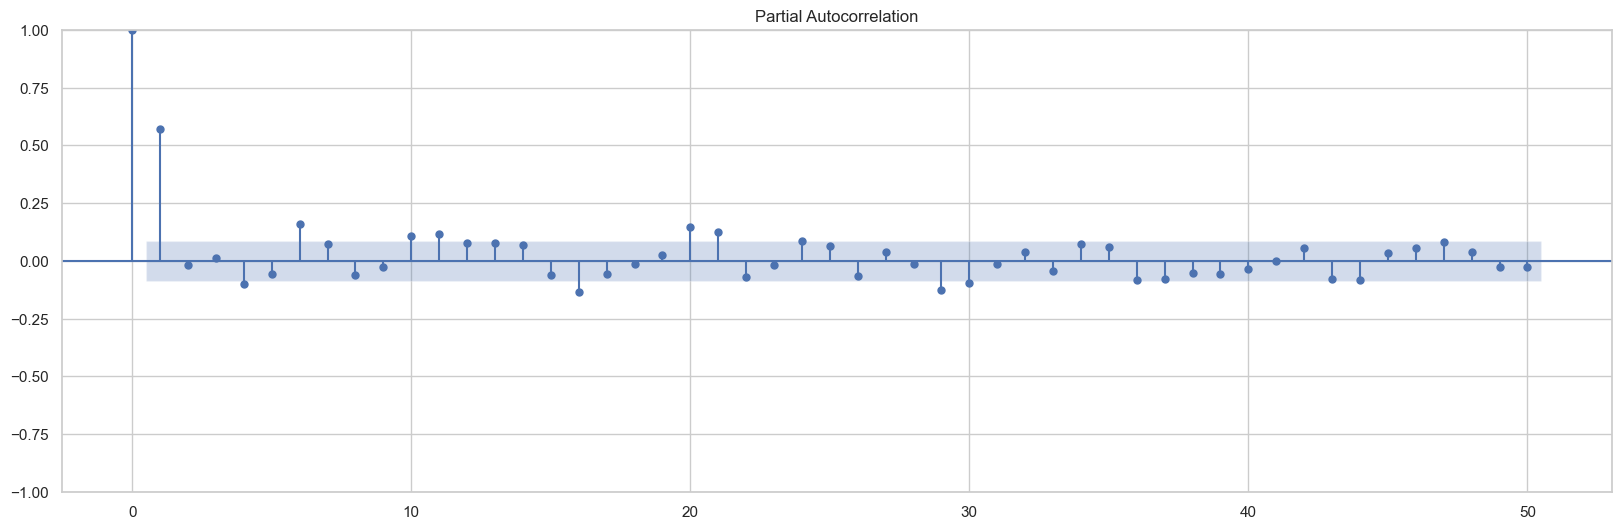

### ACF and PACF for location type: L1

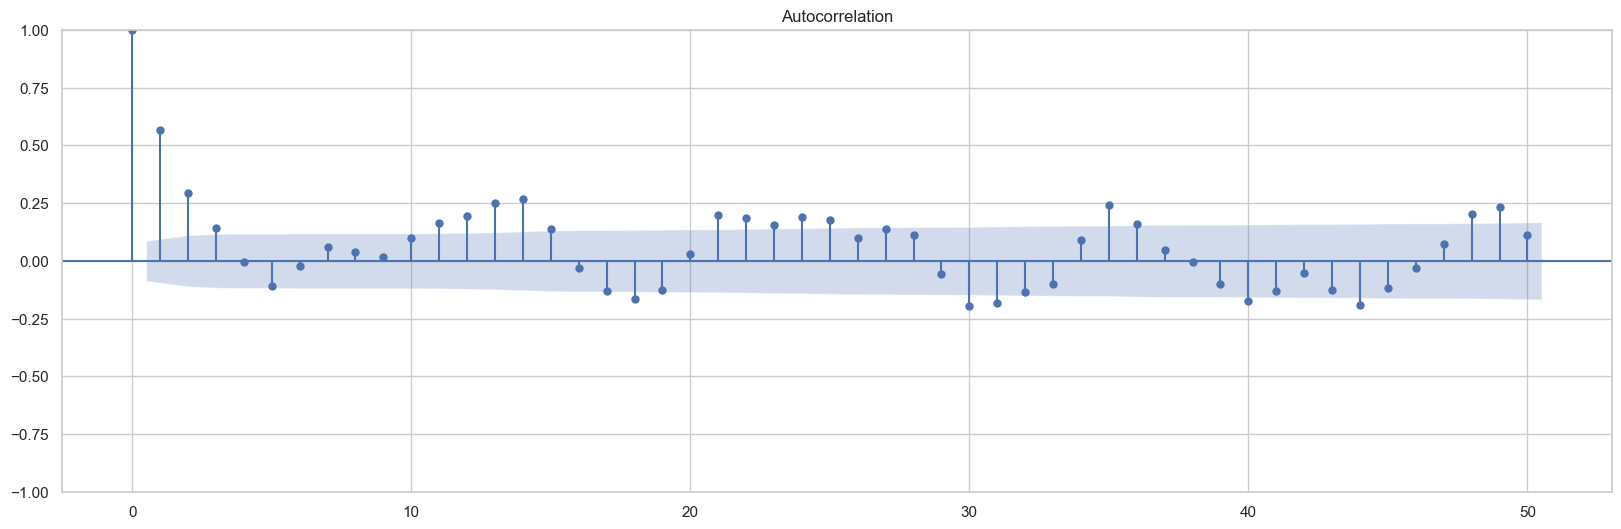

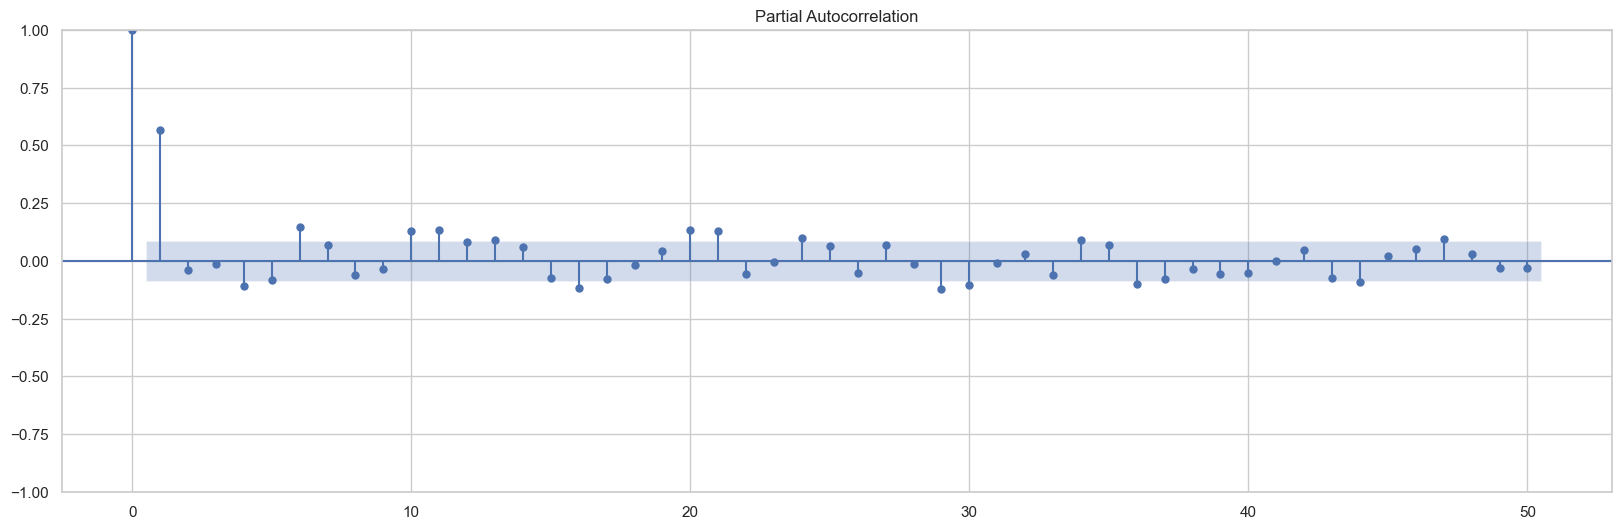

### ACF and PACF for location type: L4

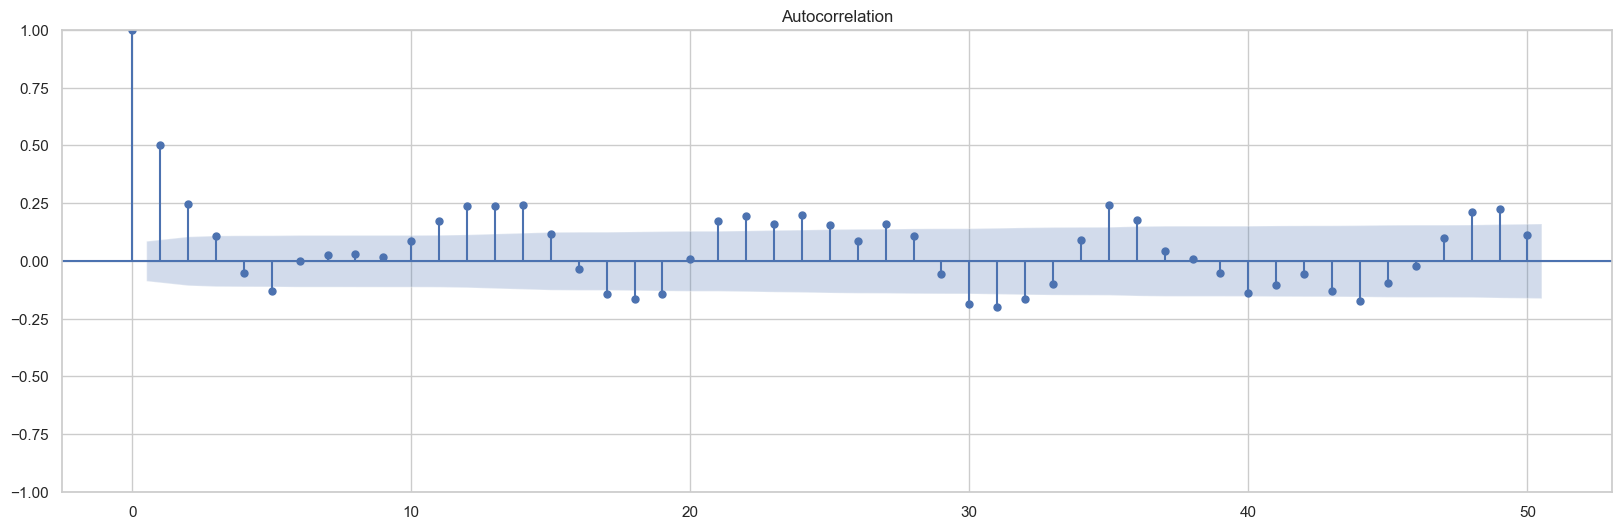

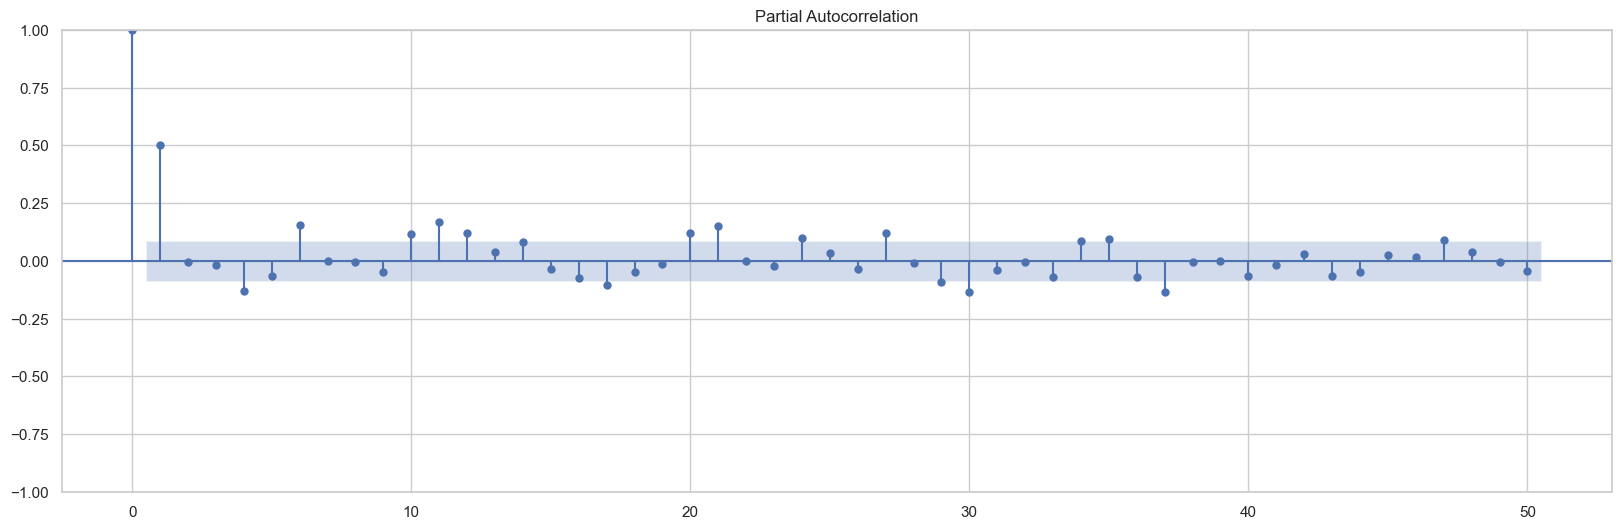

In [11]:
plt.rc("figure",figsize=(20,6))

for location_type in train_location_type_agg["Location_Type"].unique():
    display(Markdown('### ACF and PACF for location type: ' + location_type))
    plot_acf(train_location_type_agg[train_location_type_agg["Location_Type"] == location_type]["Total_Sales"], lags=50)
    plot_pacf(train_location_type_agg[train_location_type_agg["Location_Type"] == location_type]["Total_Sales"], lags=50)
    plt.show()


### ACF and PACF for Region code: R4

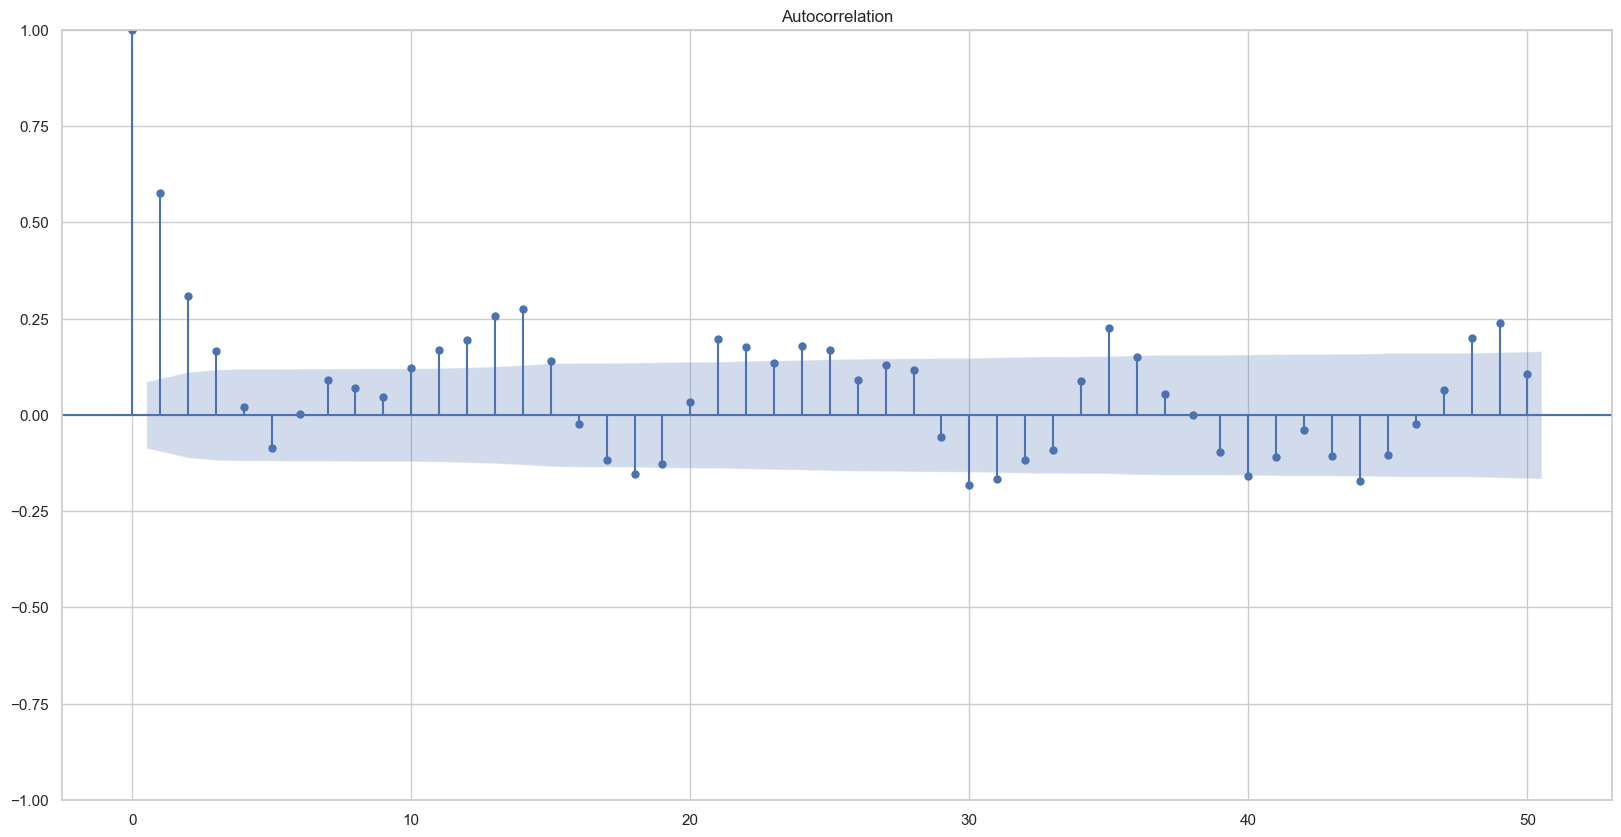

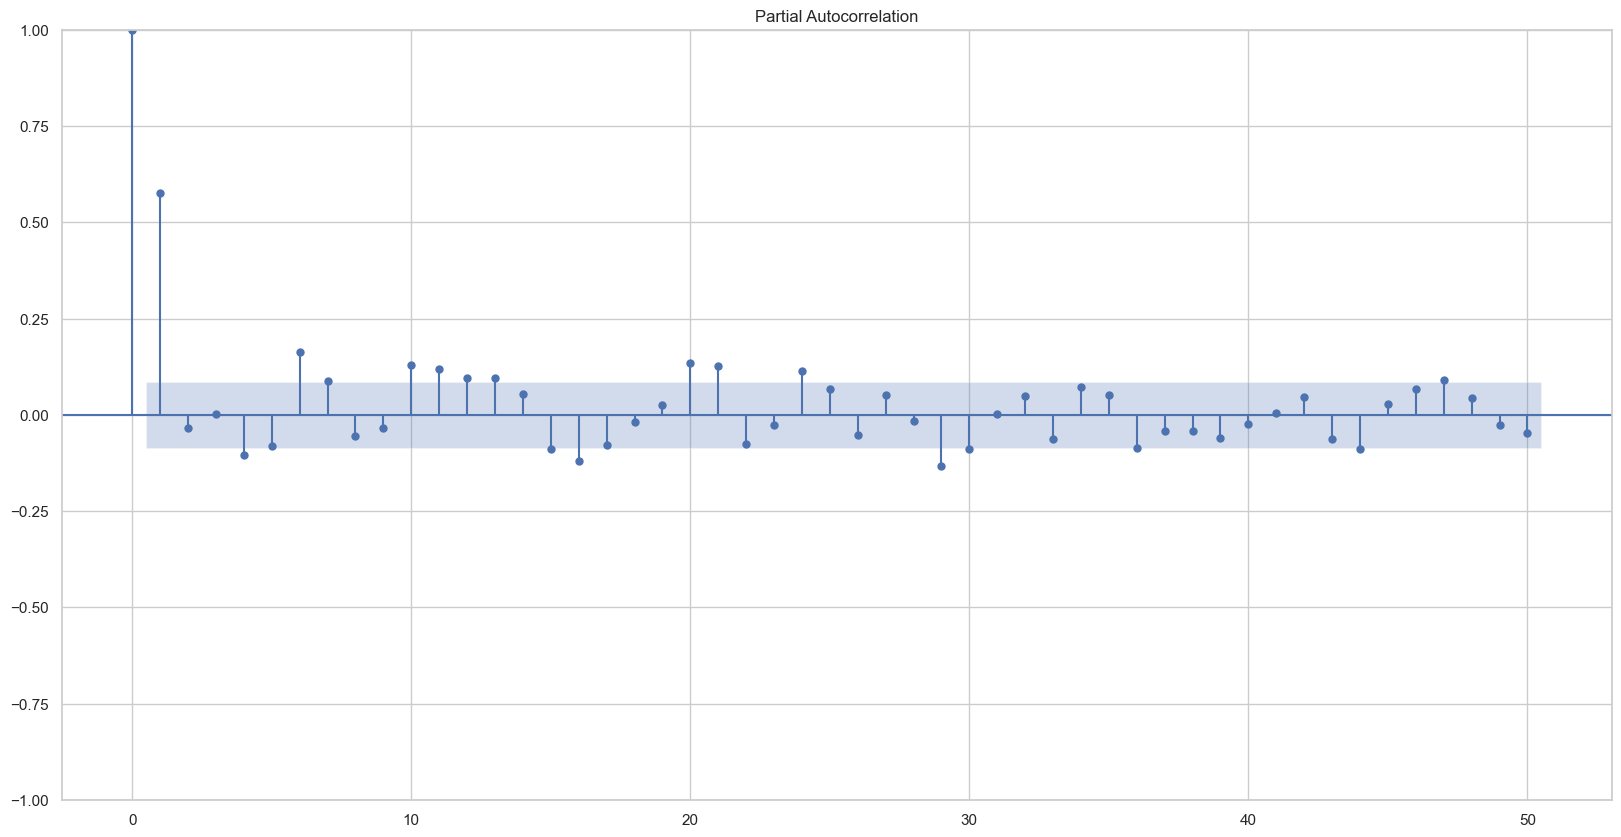

### ACF and PACF for Region code: R2

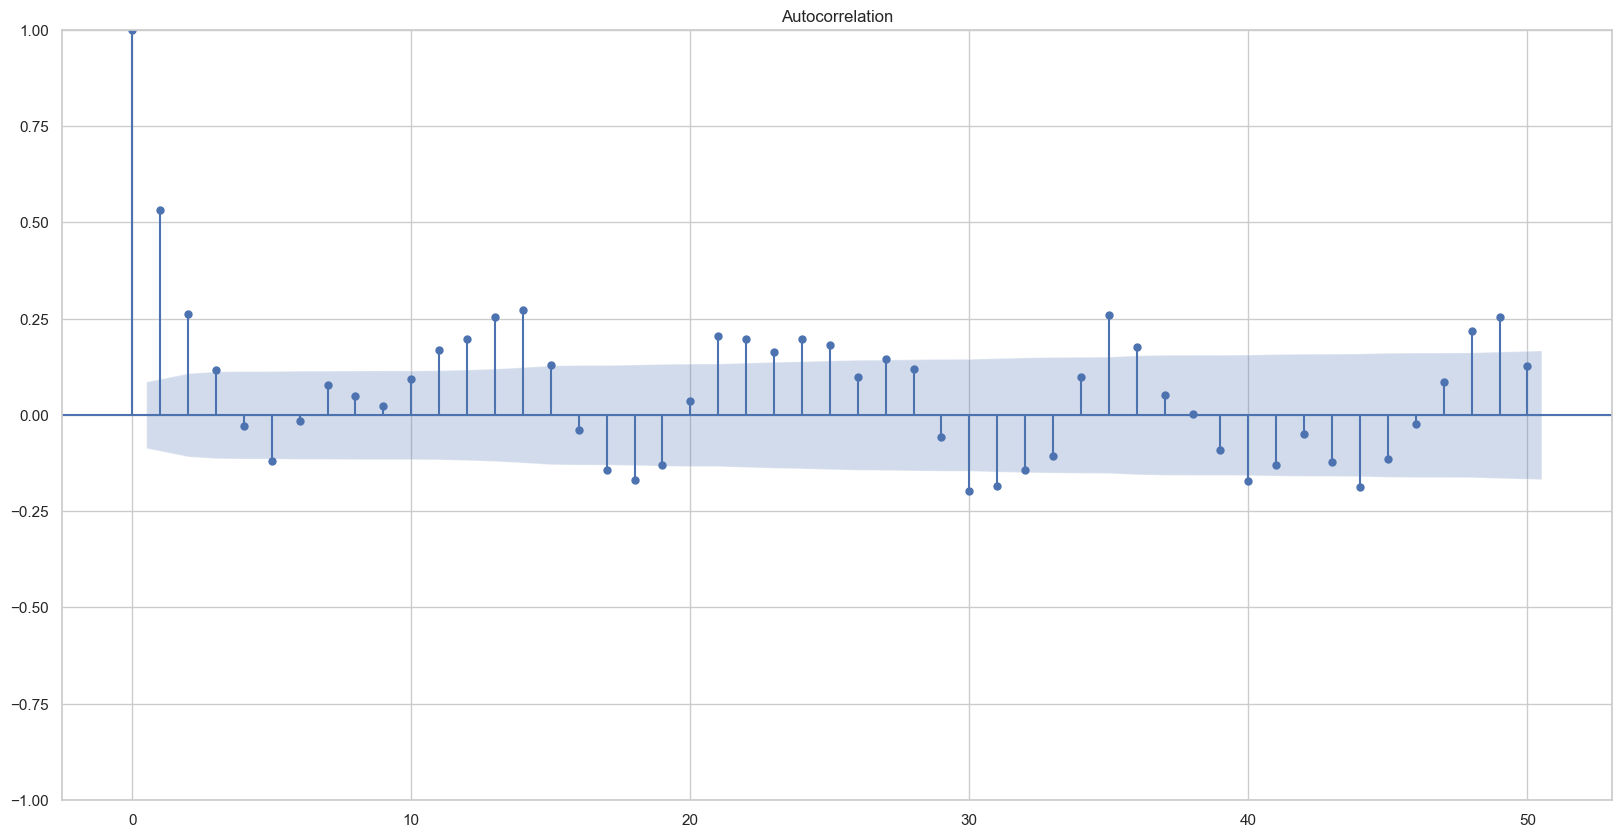

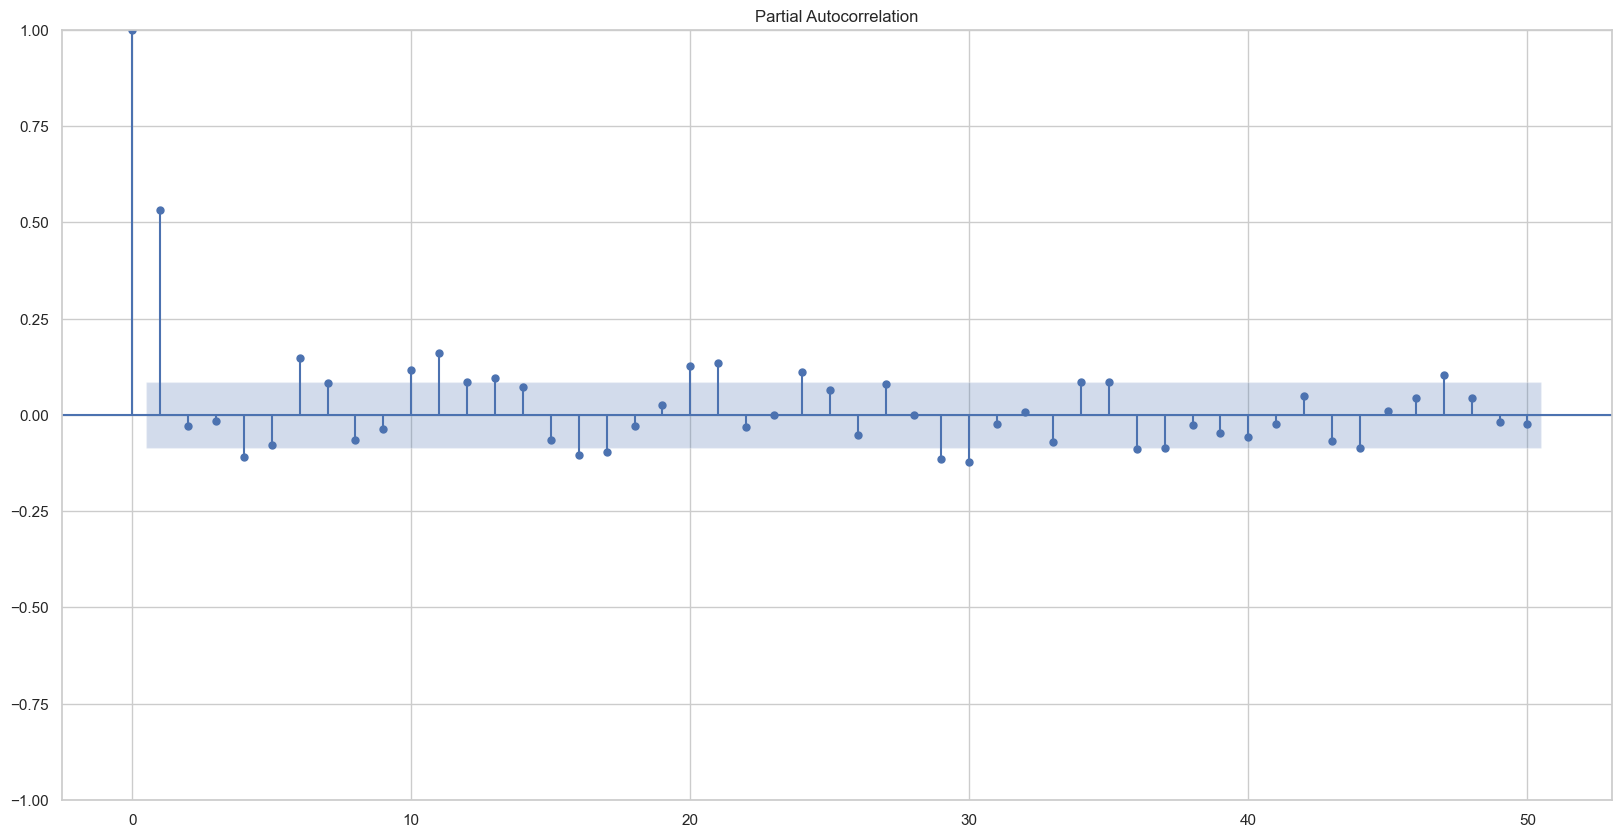

### ACF and PACF for Region code: R1

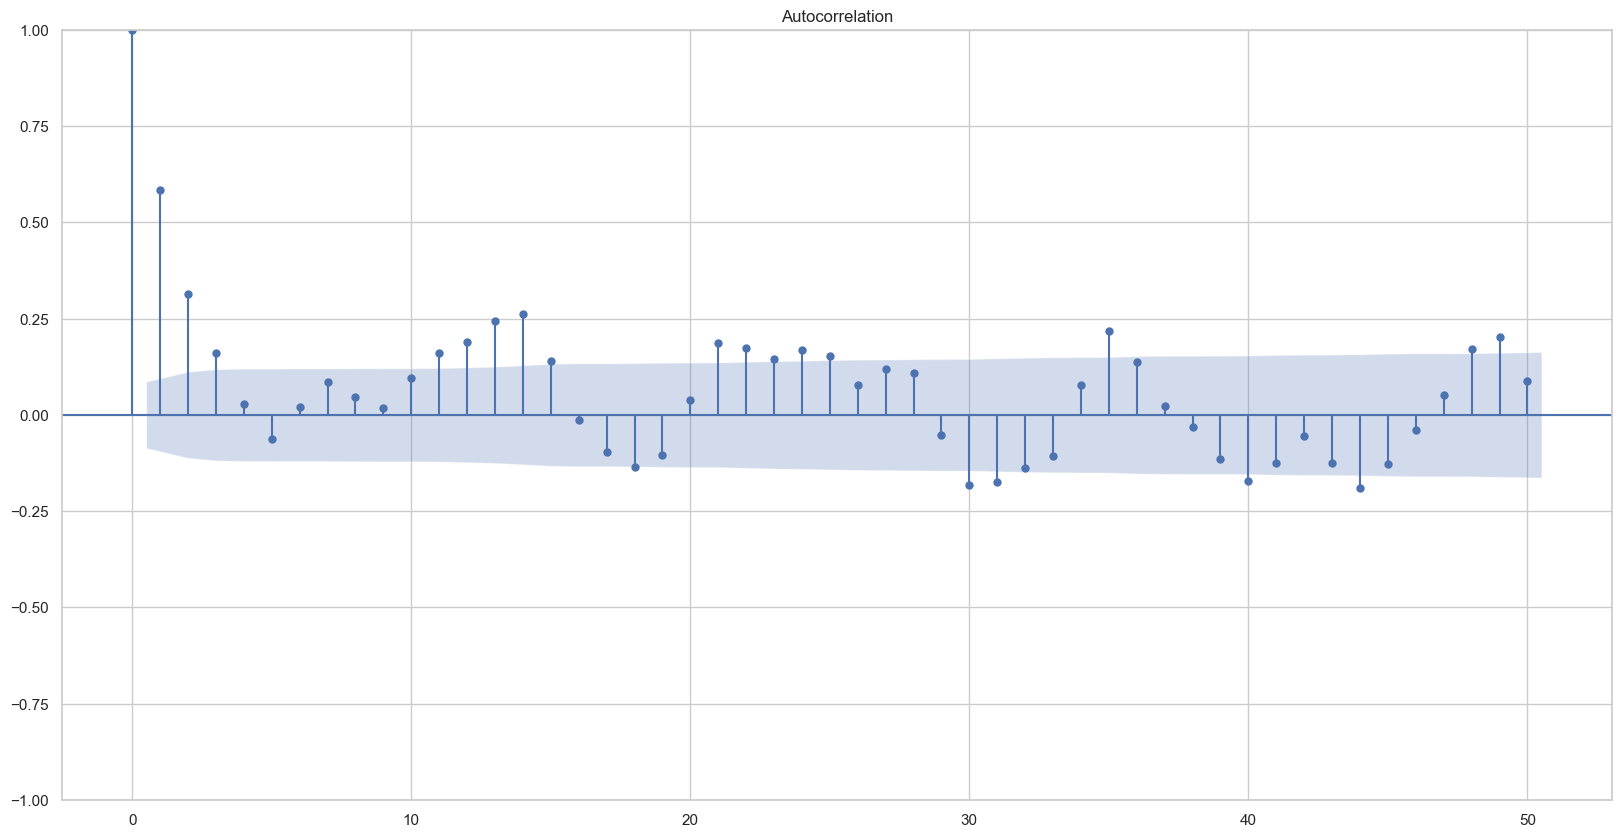

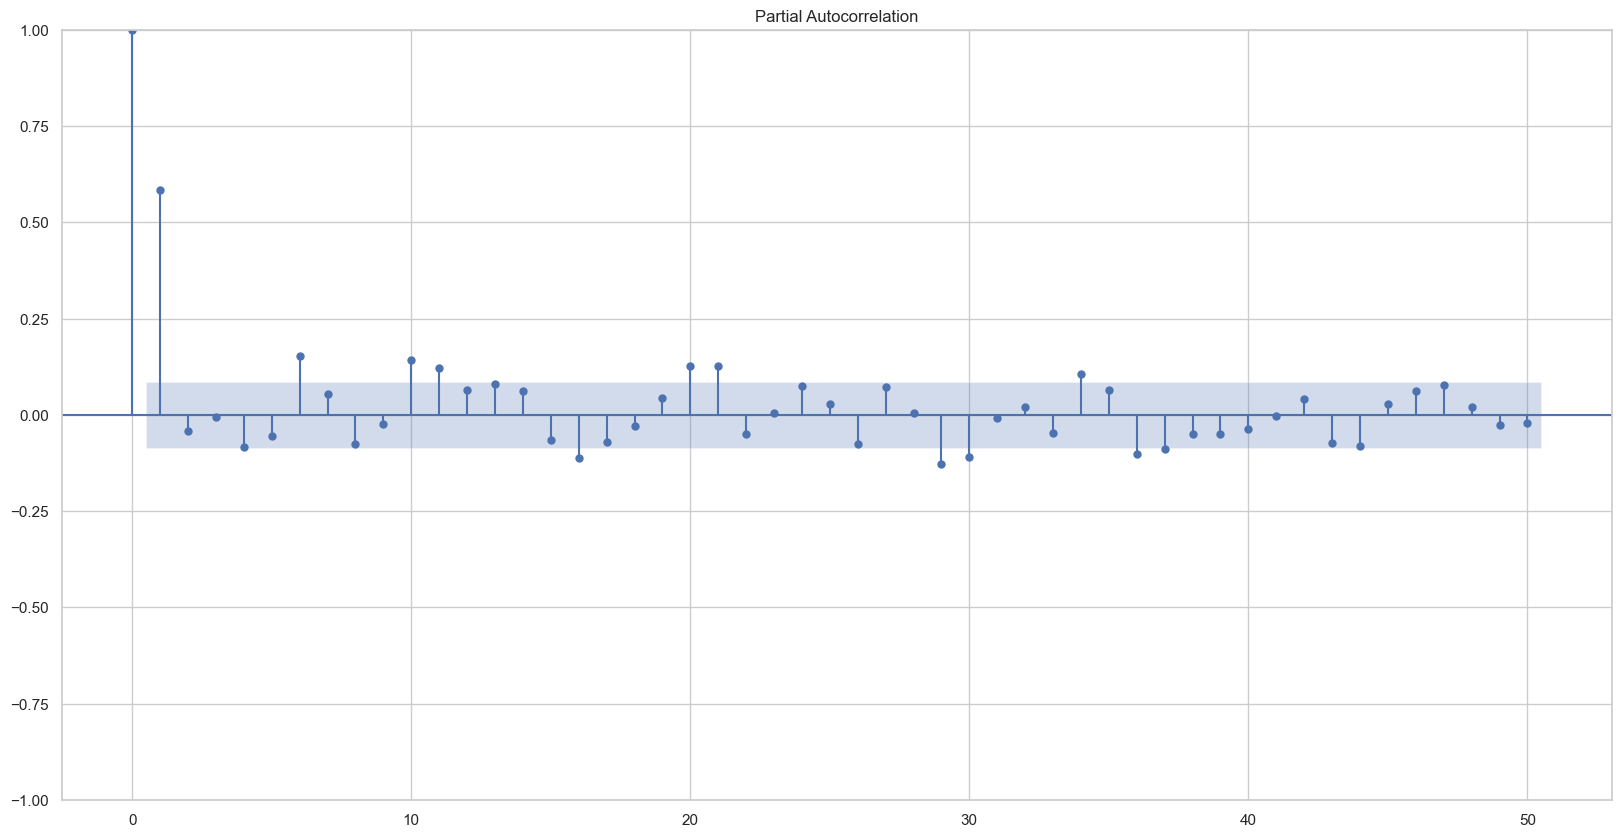

### ACF and PACF for Region code: R3

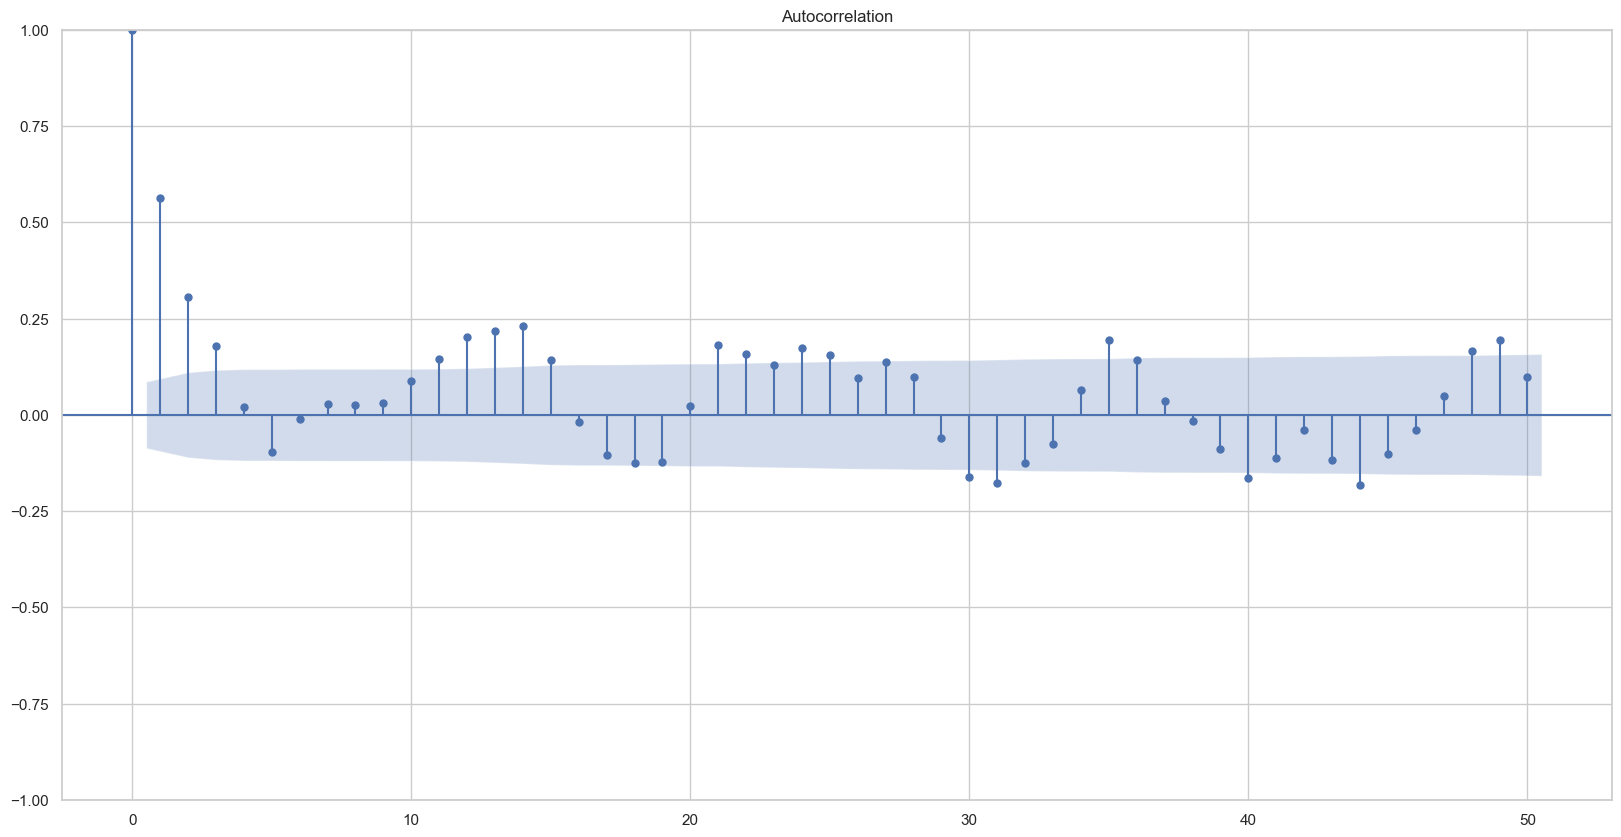

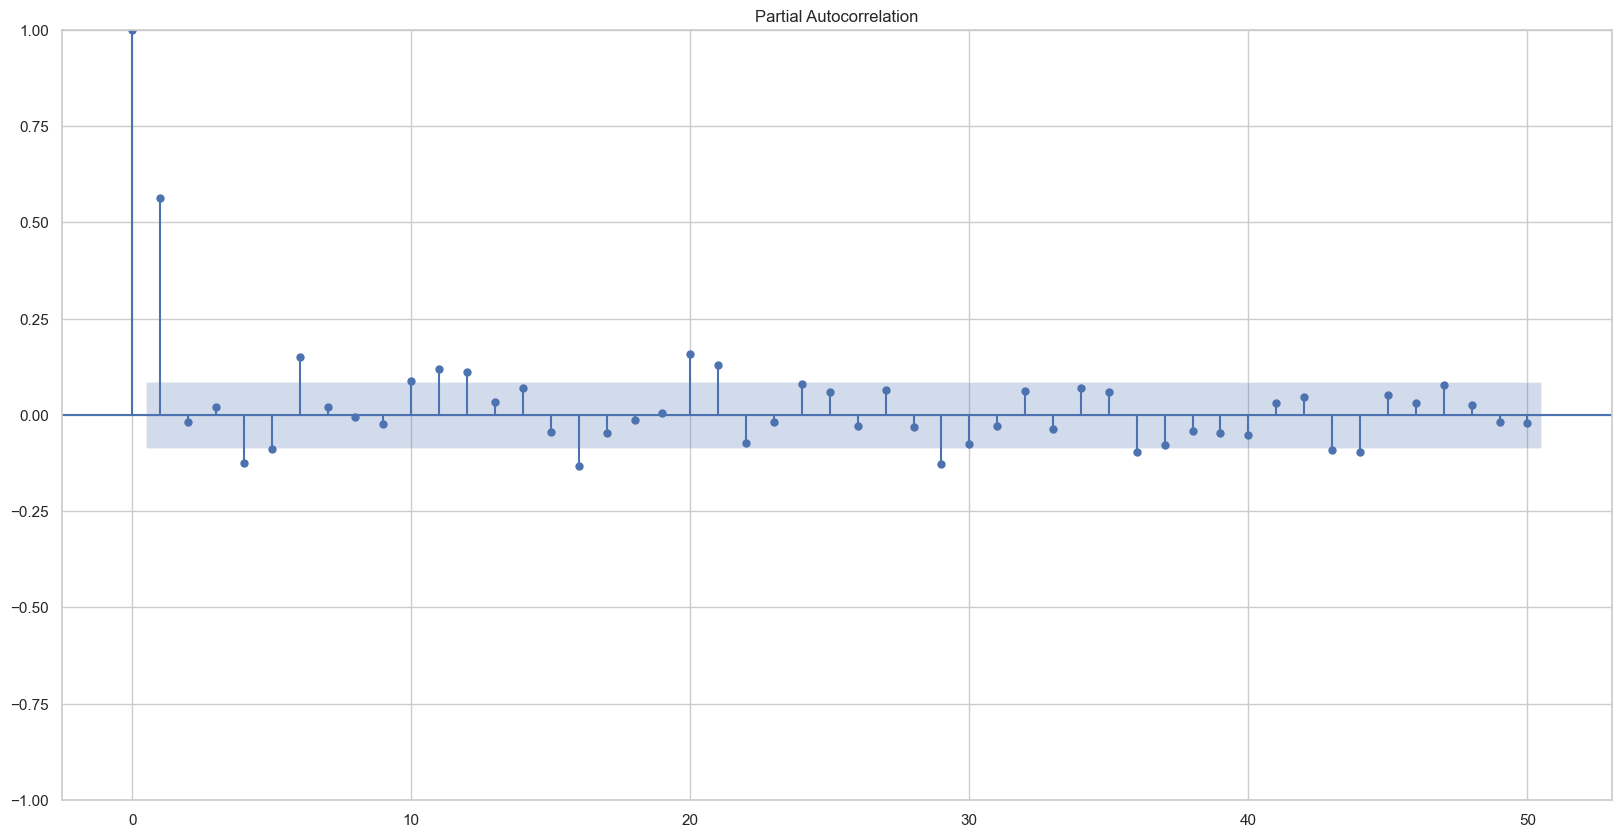

In [46]:

for Region_Code in train_region_code_agg["Region_Code"].unique():
    display(Markdown('### ACF and PACF for Region code: ' + Region_Code))
    plot_acf(train_region_code_agg[train_region_code_agg["Region_Code"] == Region_Code]["Total_Sales"], lags=50)
    plot_pacf(train_region_code_agg[train_region_code_agg["Region_Code"] == Region_Code]["Total_Sales"], lags=50)
    plt.show()

### ACF and PACF for Store type: S4

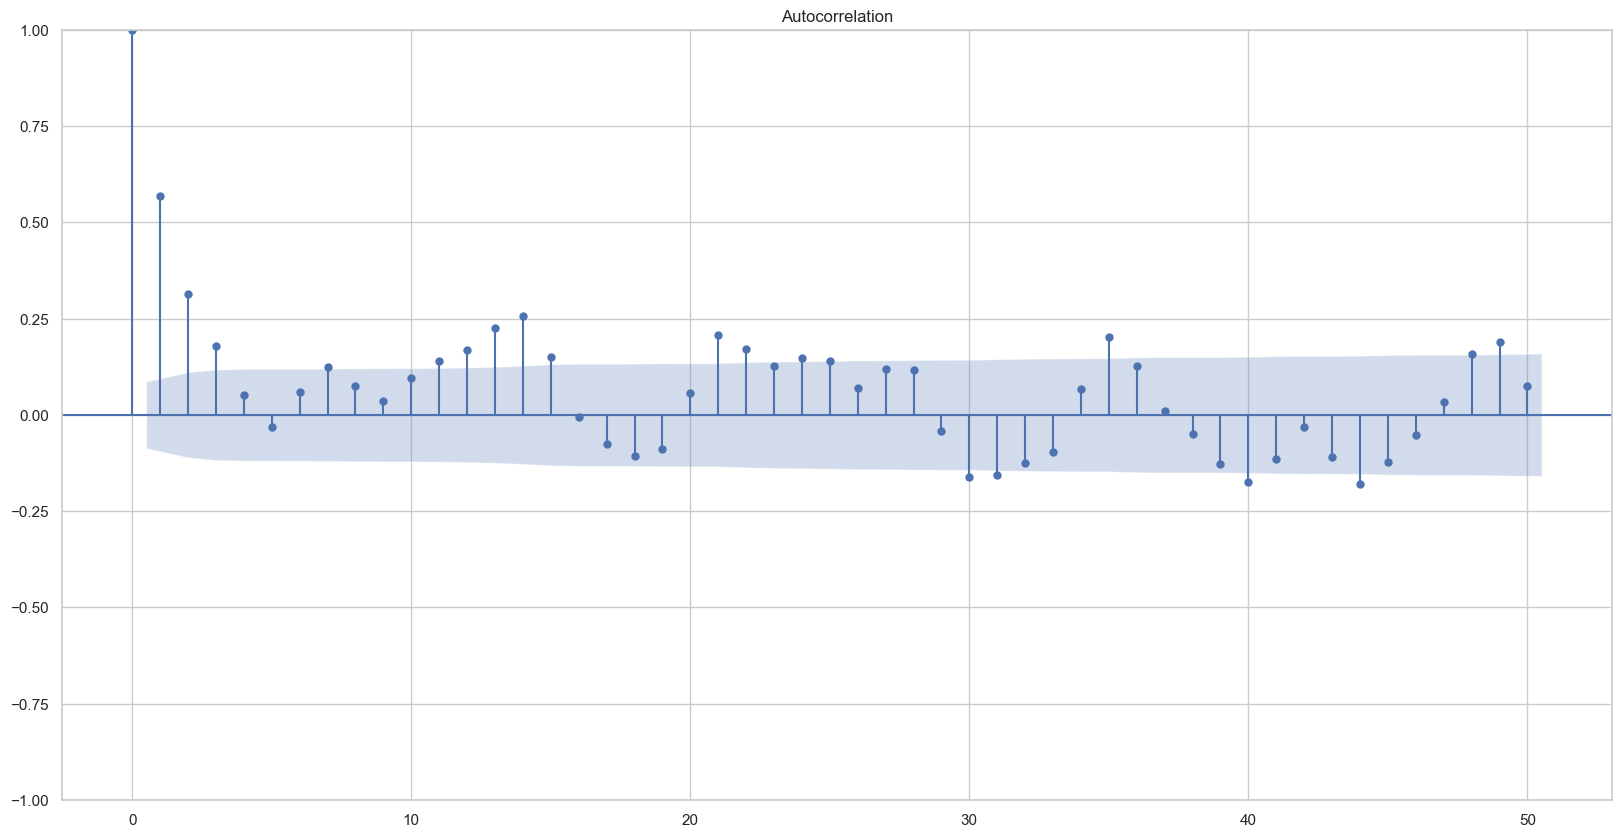

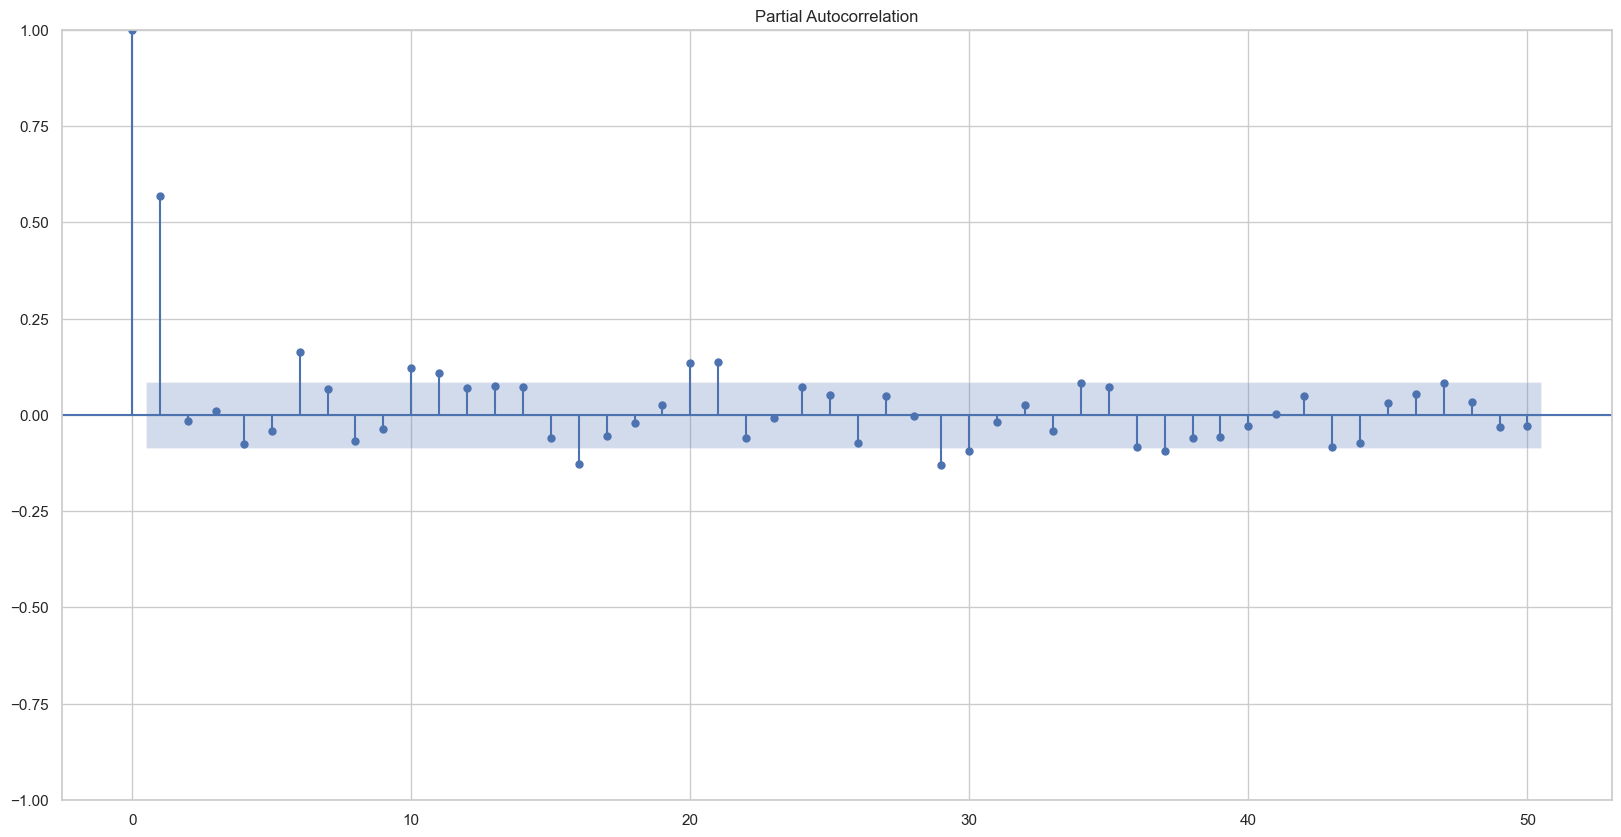

### ACF and PACF for Store type: S1

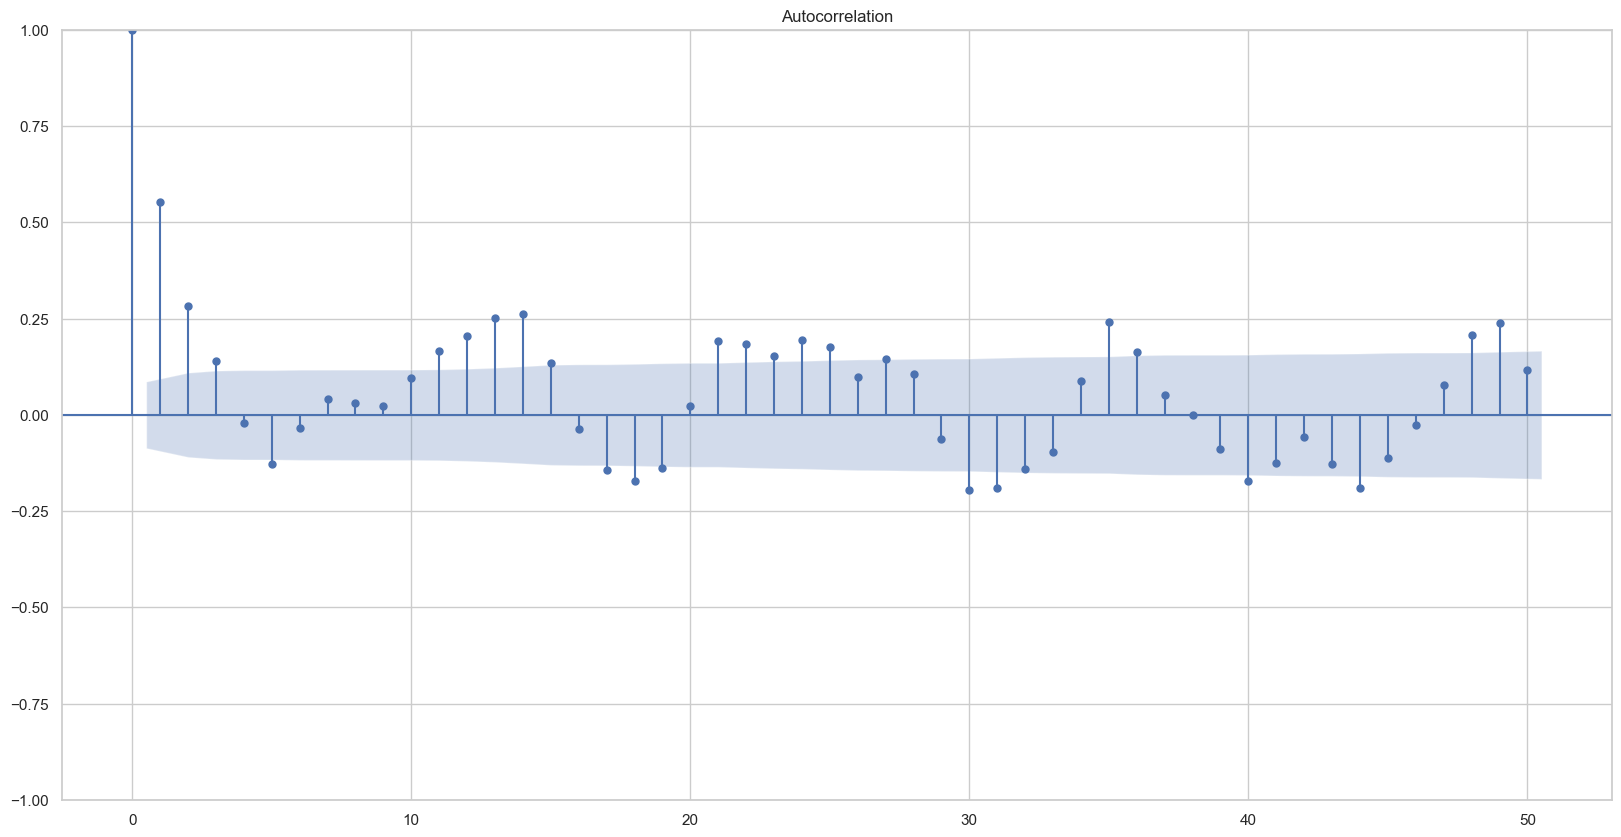

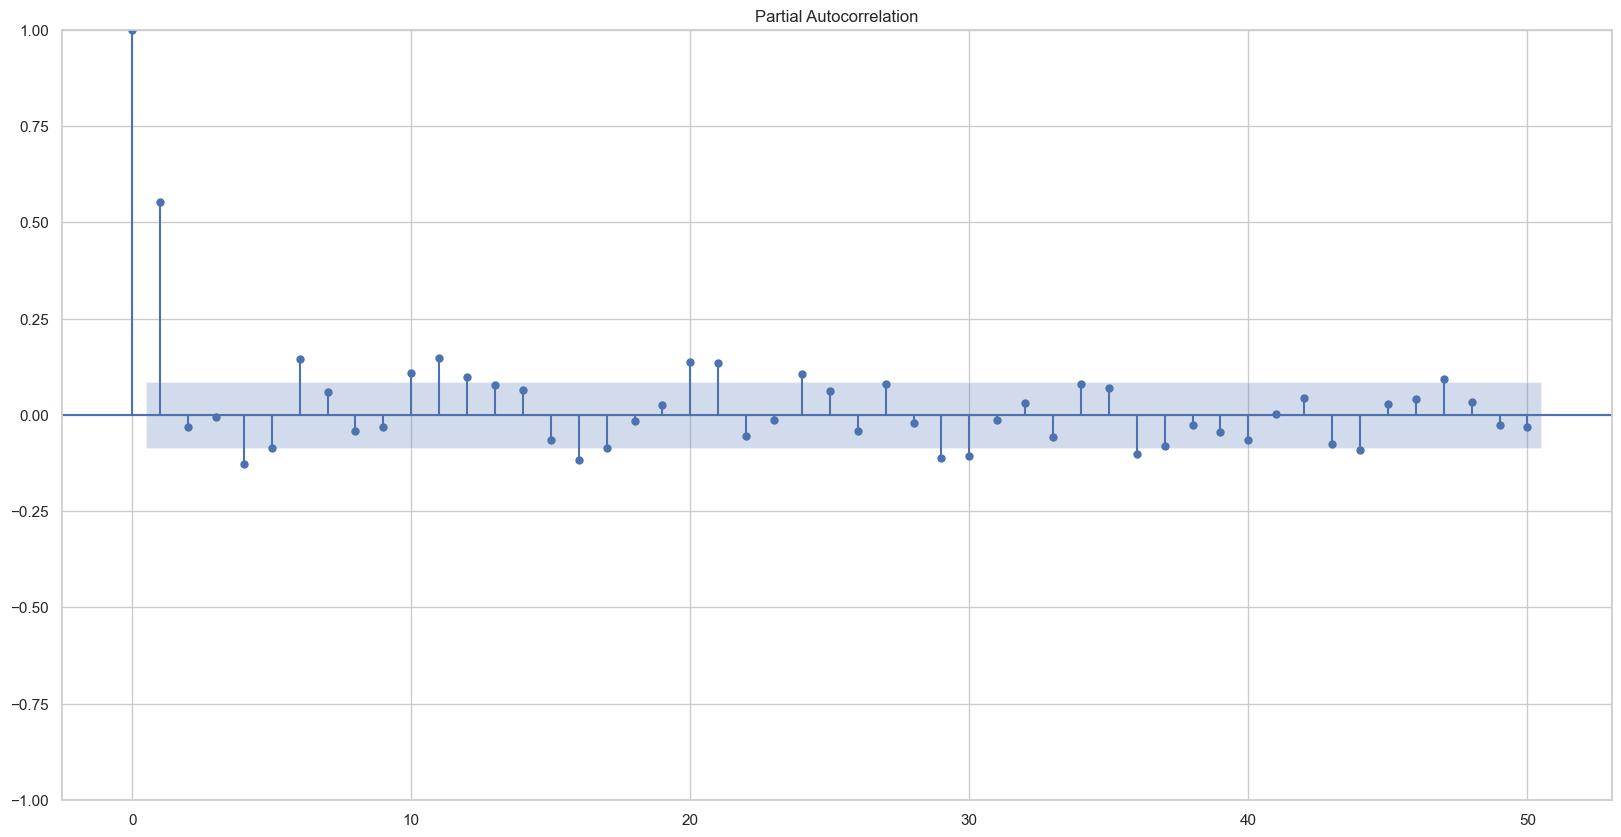

### ACF and PACF for Store type: S3

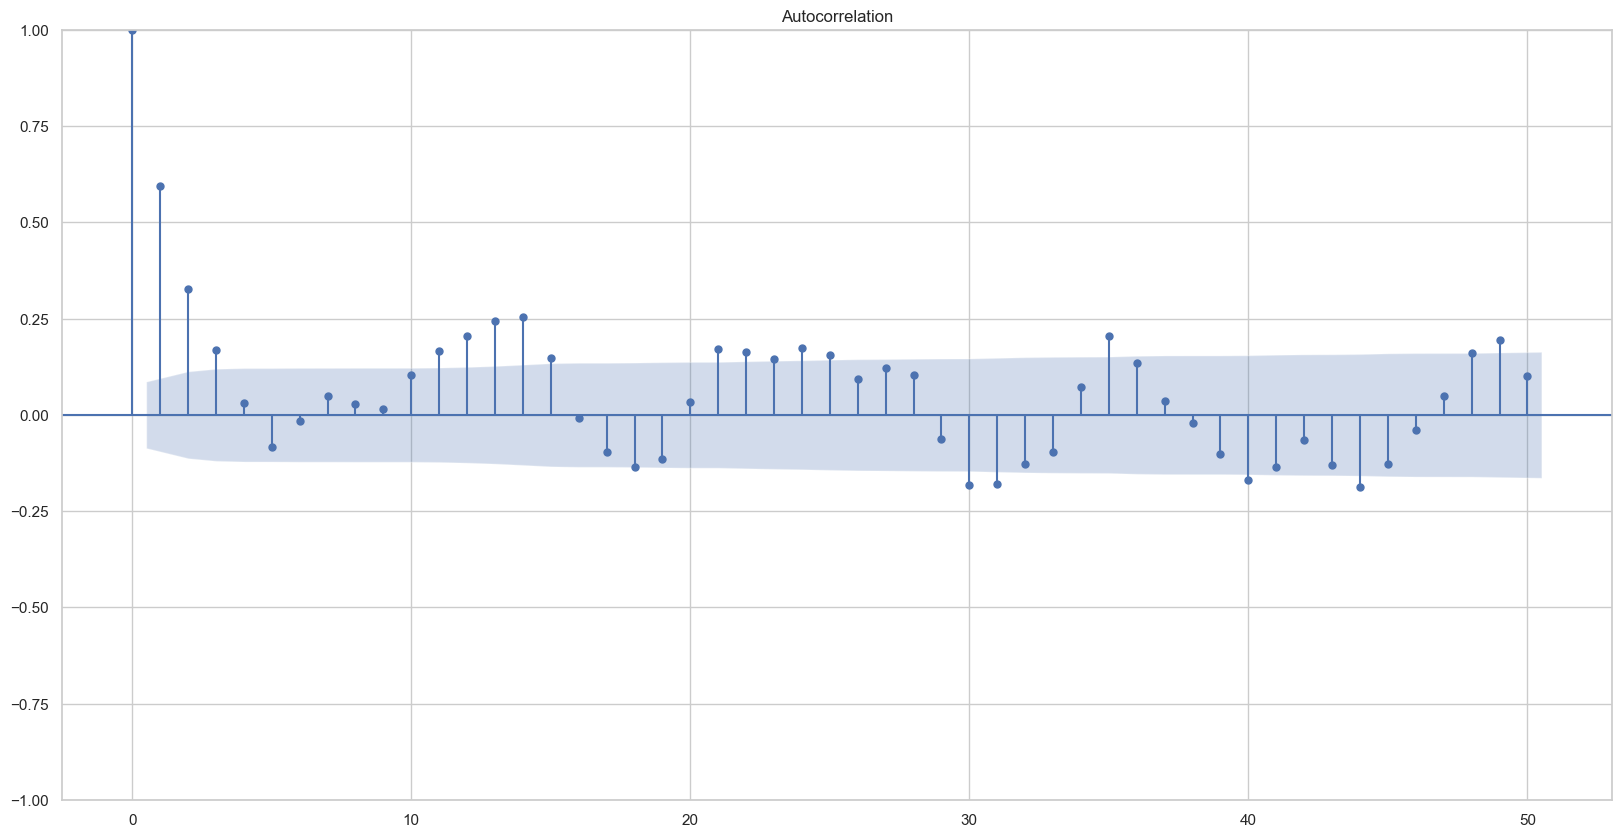

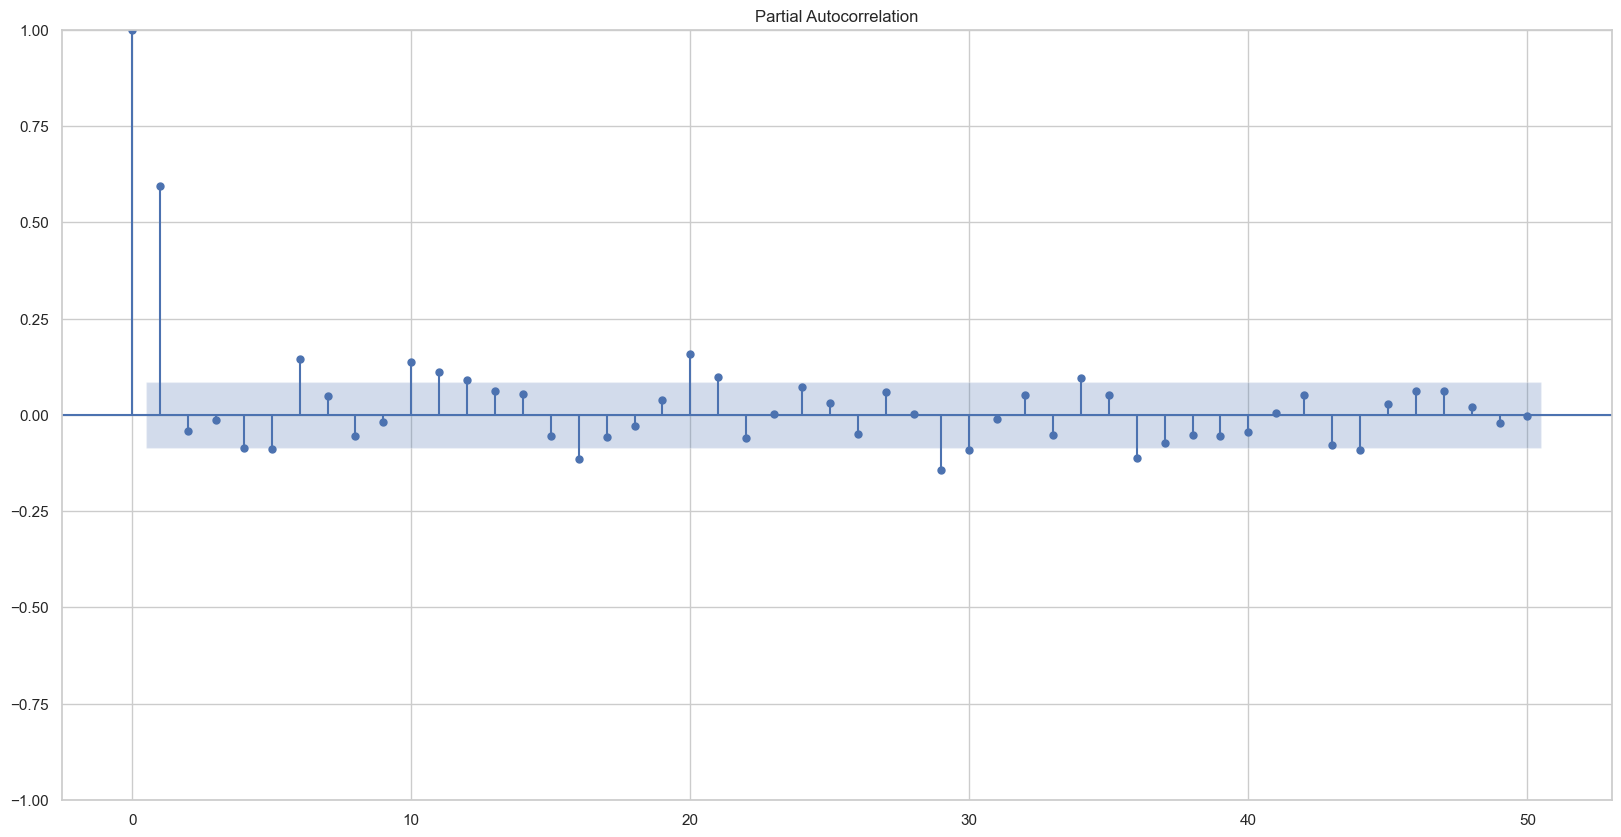

### ACF and PACF for Store type: S2

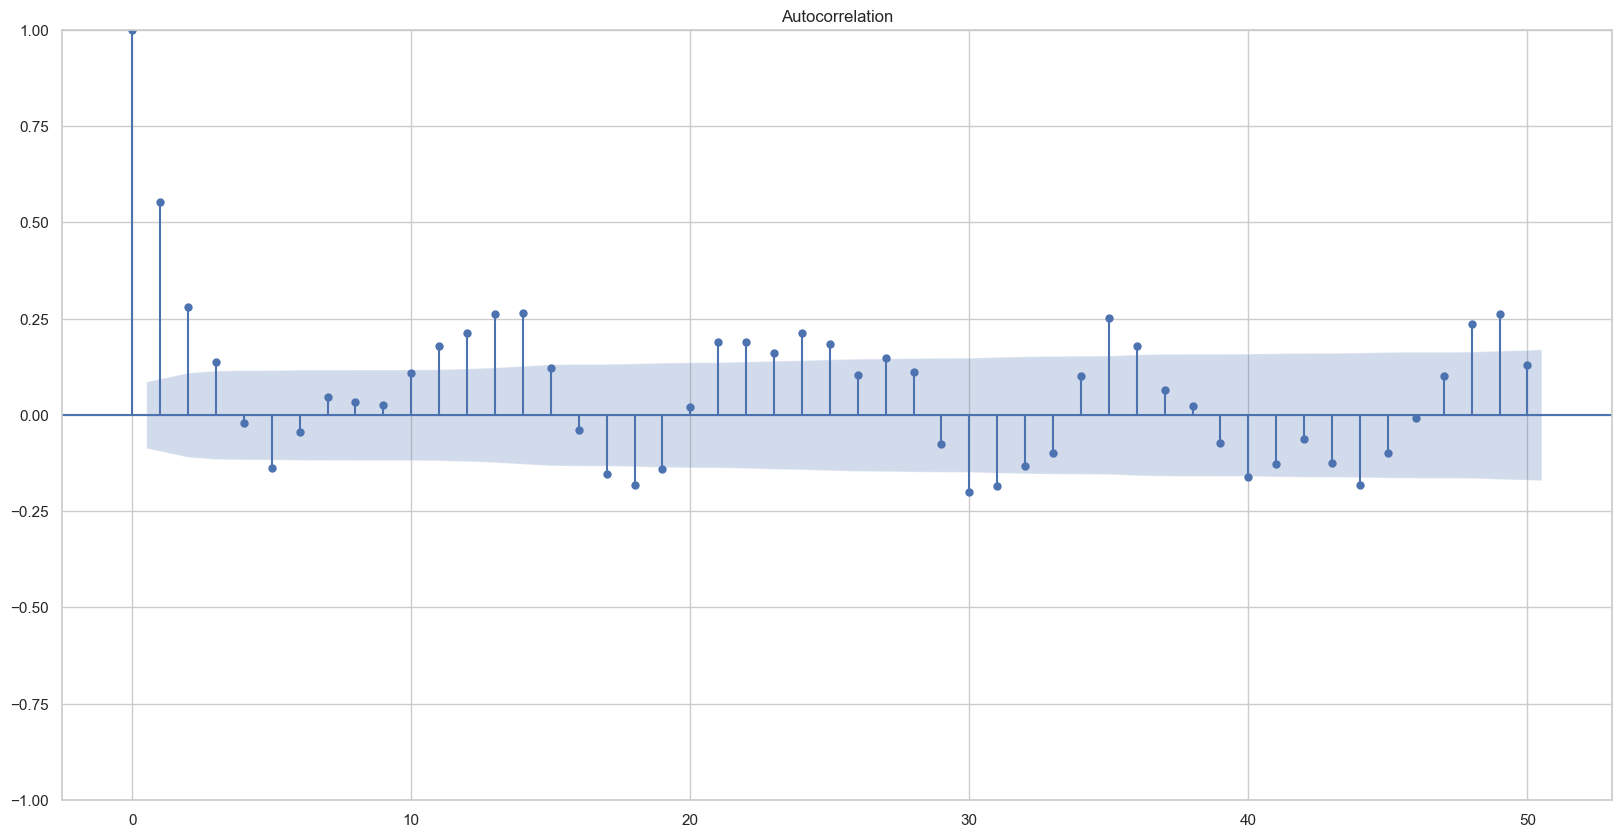

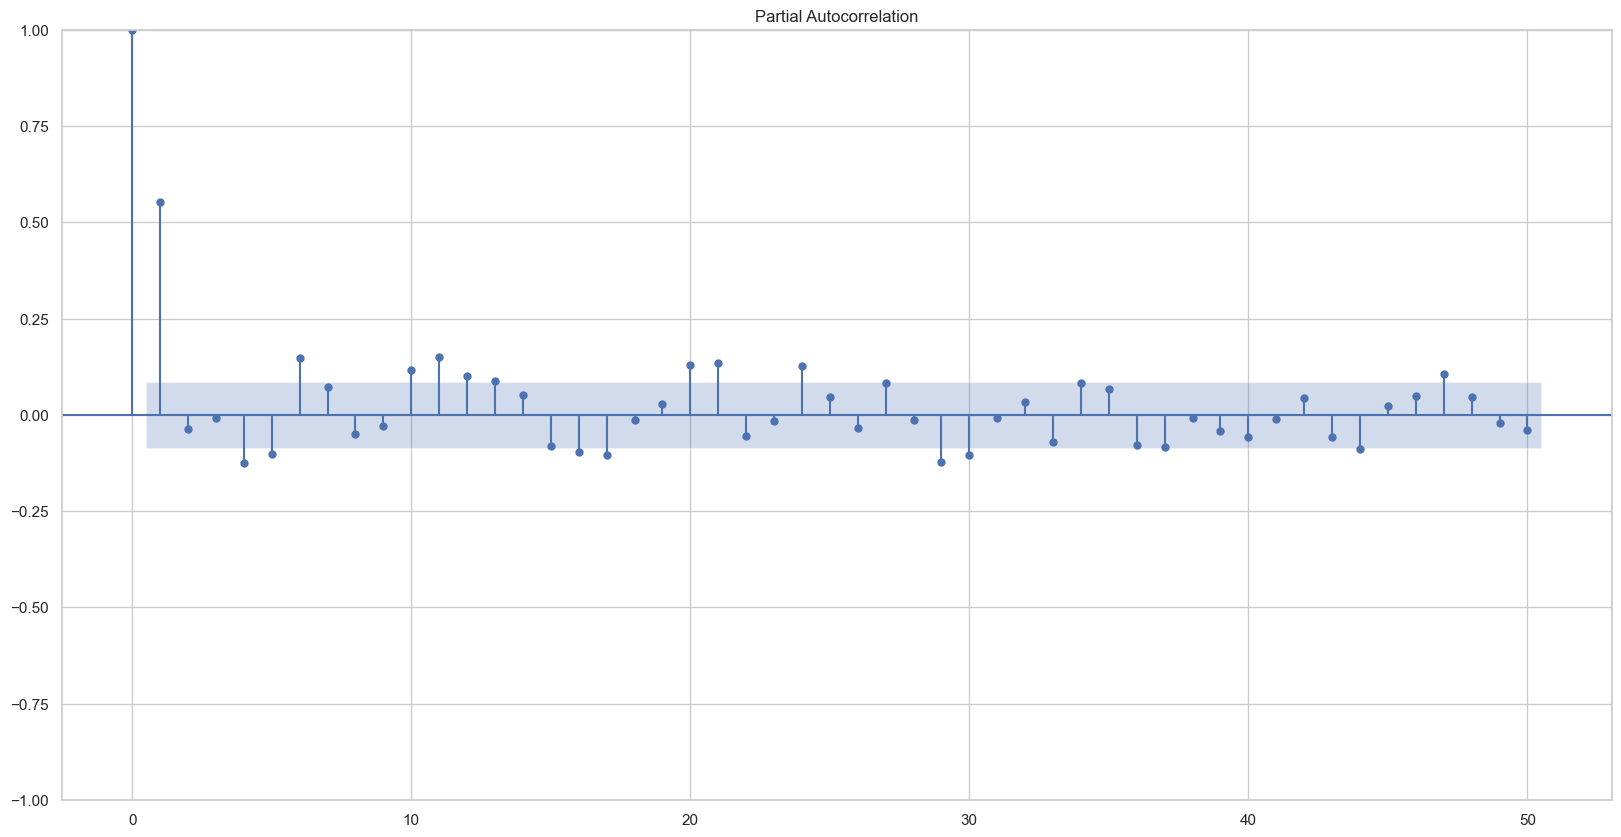

In [47]:

for Store_Type in train_store_type_agg["Store_Type"].unique():
    display(Markdown('### ACF and PACF for Store type: ' + Store_Type))
    plot_acf(train_store_type_agg[train_store_type_agg["Store_Type"] == Store_Type]["Total_Sales"], lags=50)
    plot_pacf(train_store_type_agg[train_store_type_agg["Store_Type"] == Store_Type]["Total_Sales"], lags=50)
    plt.show()